In [1]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

In [3]:
train = pd.read_csv(r'C:\Users\dlwks\OneDrive\바탕 화면\VSCode\DACON_CODE_REVIEW\건설 기계 오일\train.csv')
test = pd.read_csv(r'C:\Users\dlwks\OneDrive\바탕 화면\VSCode\DACON_CODE_REVIEW\건설 기계 오일\test.csv')
submission = pd.read_csv(r'C:\Users\dlwks\OneDrive\바탕 화면\VSCode\DACON_CODE_REVIEW\건설 기계 오일\sample_submission.csv')

In [4]:
train.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0


In [5]:
a = train.columns
b = test.columns

print(a)
print(b)

Index(['ID', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR',
       'SAMPLE_TRANSFER_DAY', 'ANONYMOUS_2', 'AG', 'AL', 'B', 'BA', 'BE', 'CA',
       'CD', 'CO', 'CR', 'CU', 'FH2O', 'FNOX', 'FOPTIMETHGLY', 'FOXID', 'FSO4',
       'FTBN', 'FE', 'FUEL', 'H2O', 'K', 'LI', 'MG', 'MN', 'MO', 'NA', 'NI',
       'P', 'PB', 'PQINDEX', 'S', 'SB', 'SI', 'SN', 'SOOTPERCENTAGE', 'TI',
       'U100', 'U75', 'U50', 'U25', 'U20', 'U14', 'U6', 'U4', 'V', 'V100',
       'V40', 'ZN', 'Y_LABEL'],
      dtype='object')
Index(['ID', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR', 'ANONYMOUS_2', 'AG',
       'CO', 'CR', 'CU', 'FE', 'H2O', 'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V',
       'V40', 'ZN'],
      dtype='object')


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

In [7]:
print(train.shape)
print(test.shape)

(14095, 54)
(6041, 19)


In [8]:
train.isnull().sum()

ID                         0
COMPONENT_ARBITRARY        0
ANONYMOUS_1                0
YEAR                       0
SAMPLE_TRANSFER_DAY        0
ANONYMOUS_2                0
AG                         0
AL                         0
B                          0
BA                         0
BE                         0
CA                         0
CD                      1394
CO                         0
CR                         0
CU                         0
FH2O                   10205
FNOX                   10205
FOPTIMETHGLY           10205
FOXID                  10205
FSO4                   10205
FTBN                   10205
FE                         0
FUEL                   10205
H2O                        0
K                       2299
LI                         0
MG                         0
MN                         0
MO                         0
NA                         0
NI                         0
P                          0
PB                         0
PQINDEX       

In [9]:
test.isnull().sum()

ID                     0
COMPONENT_ARBITRARY    0
ANONYMOUS_1            0
YEAR                   0
ANONYMOUS_2            0
AG                     0
CO                     0
CR                     0
CU                     0
FE                     0
H2O                    0
MN                     0
MO                     0
NI                     0
PQINDEX                0
TI                     0
V                      0
V40                    0
ZN                     0
dtype: int64

In [10]:
train = train.astype({'Y_LABEL' : 'object'})

In [11]:
cat_feat = ['ID', 'COMPONENT_ARBITRARY', 'YEAR', 'Y_LABEL']
num_feat = [i for i in train.columns if i not in cat_feat]
test_features = [i for i in test.columns]

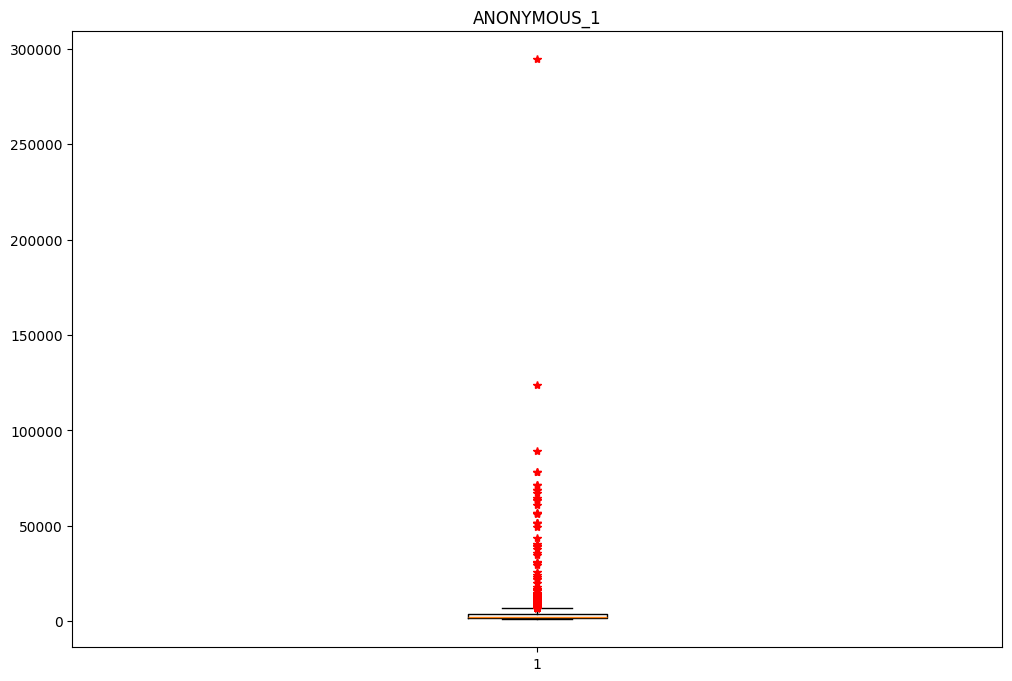

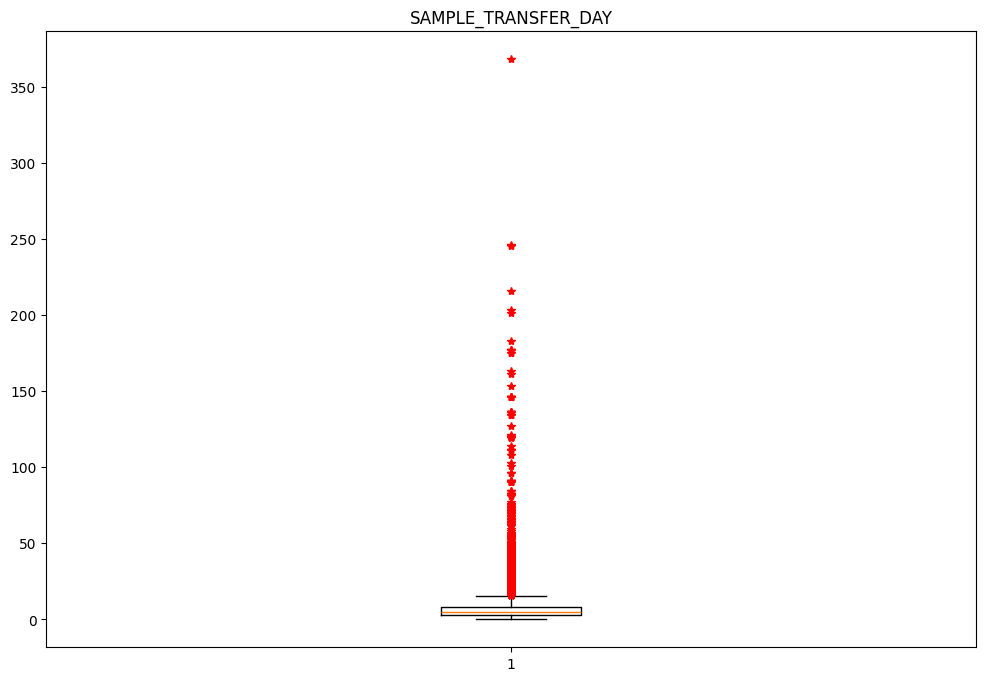

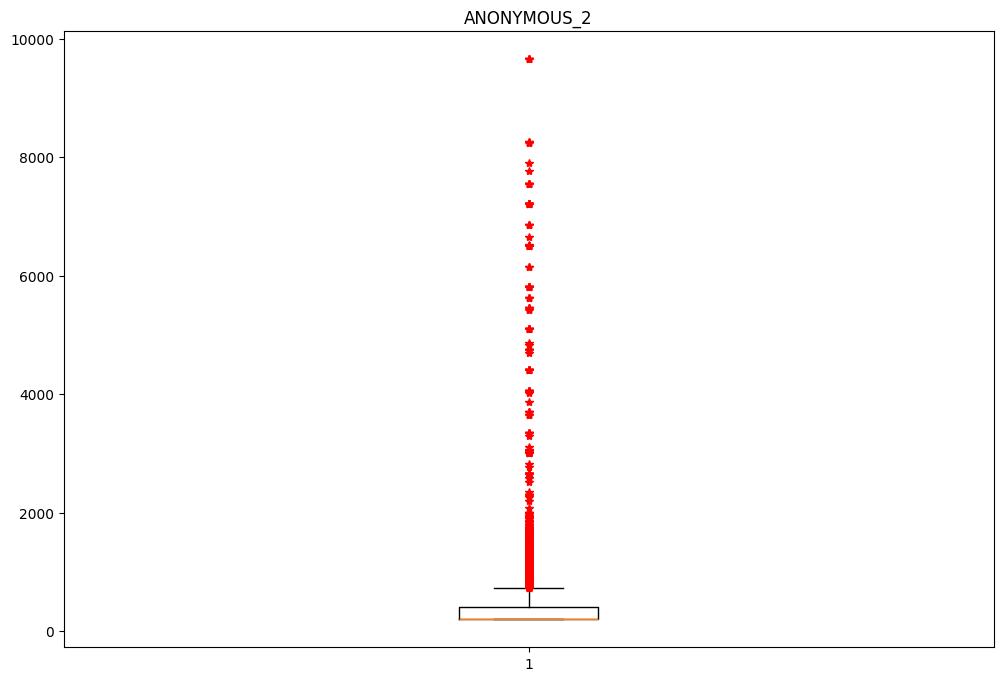

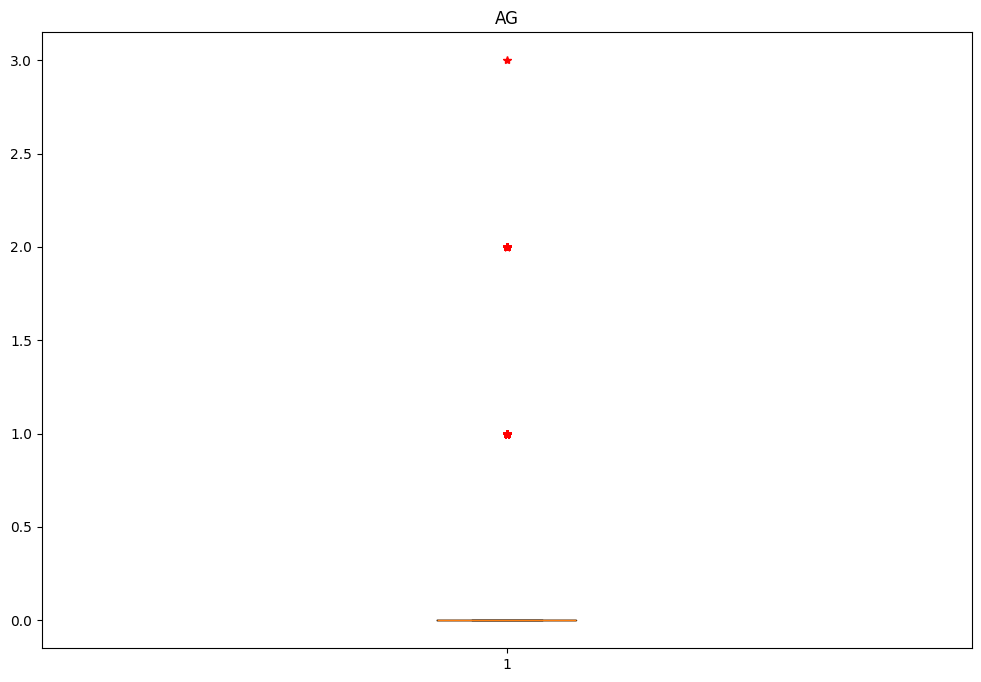

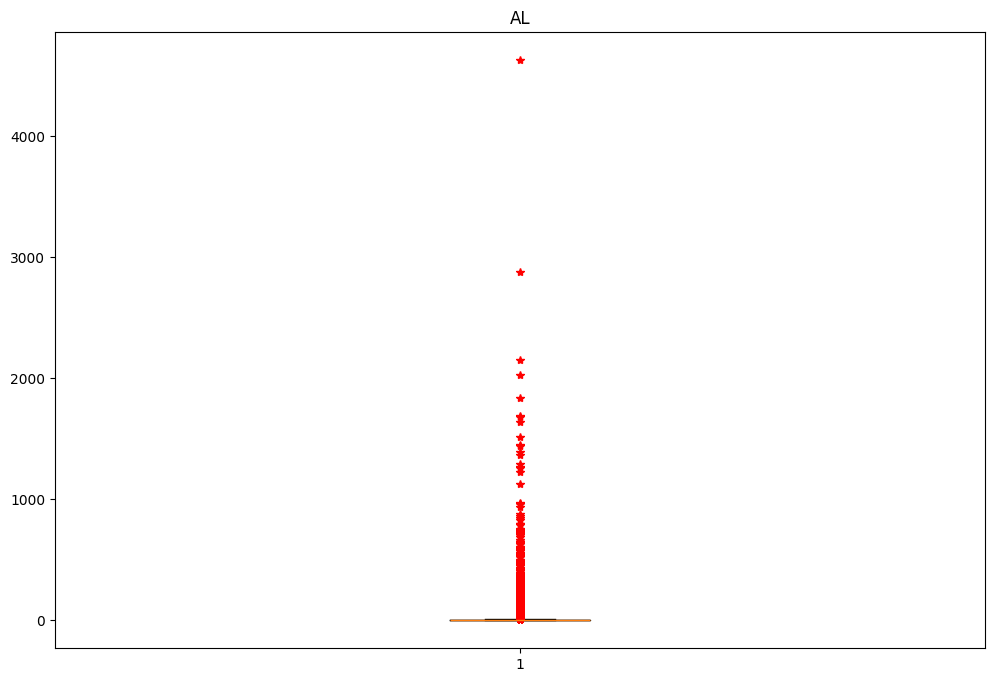

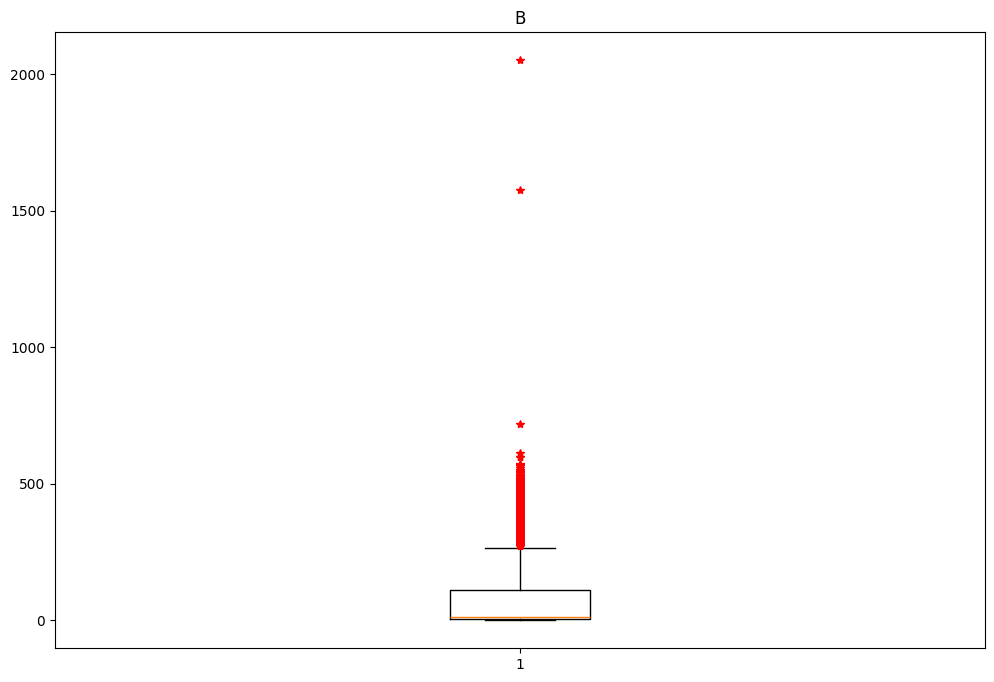

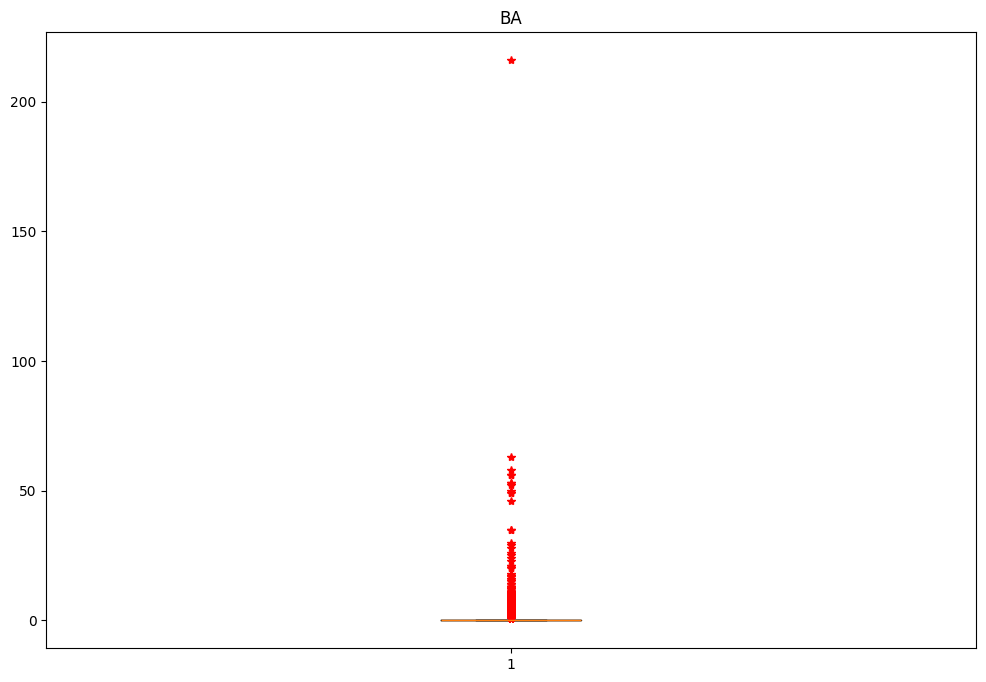

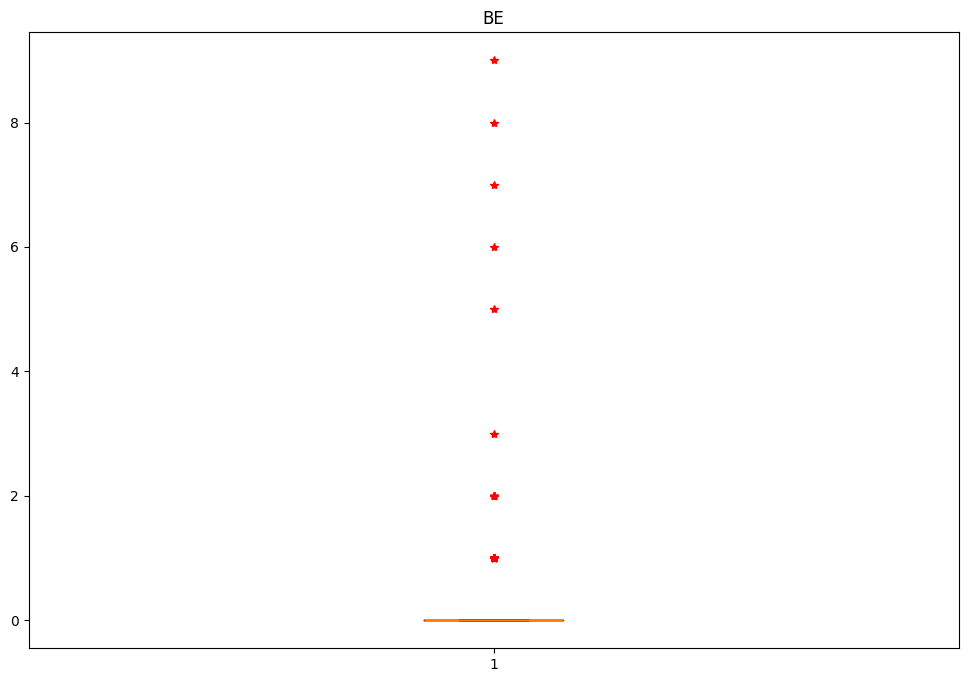

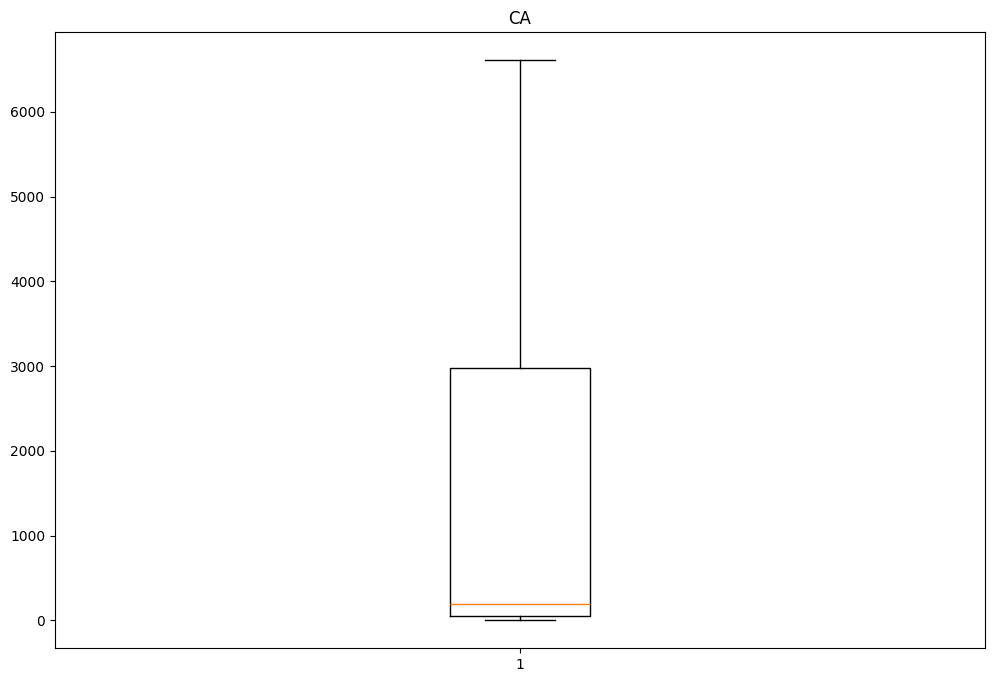

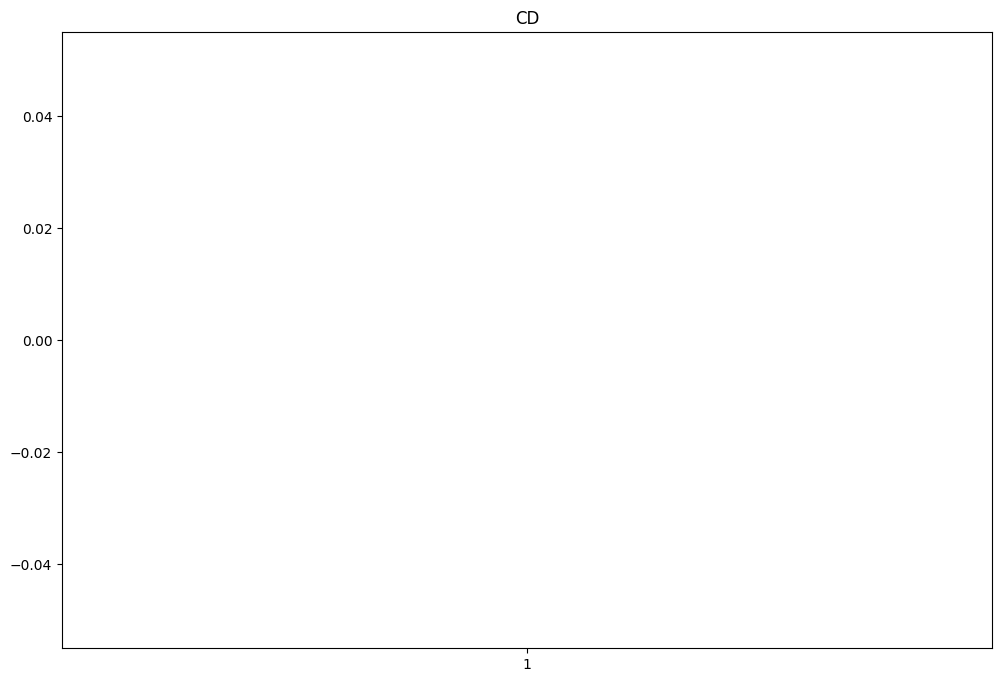

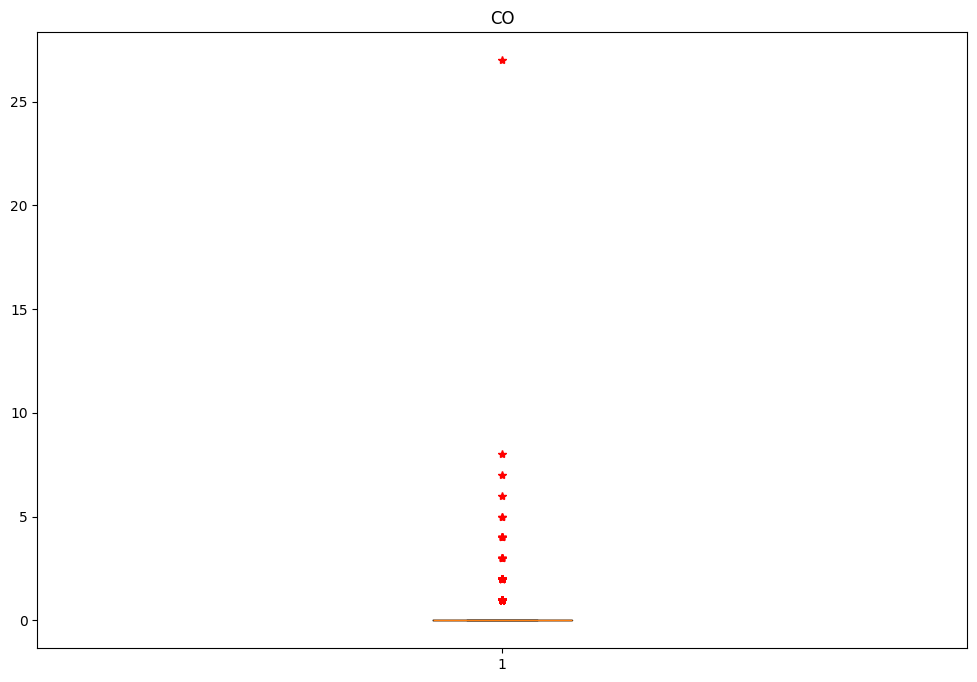

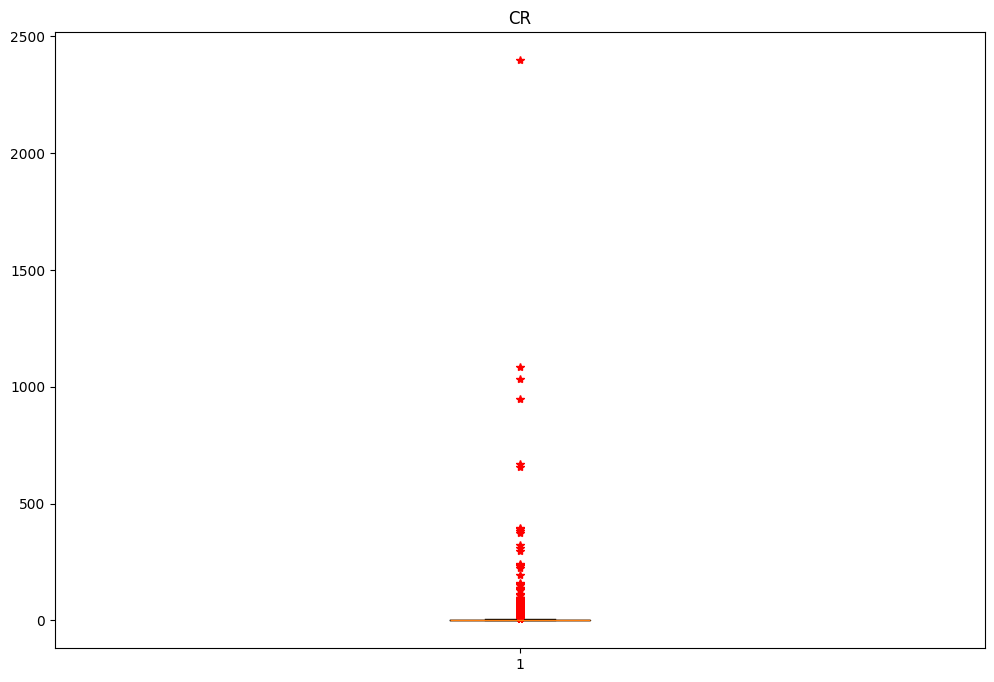

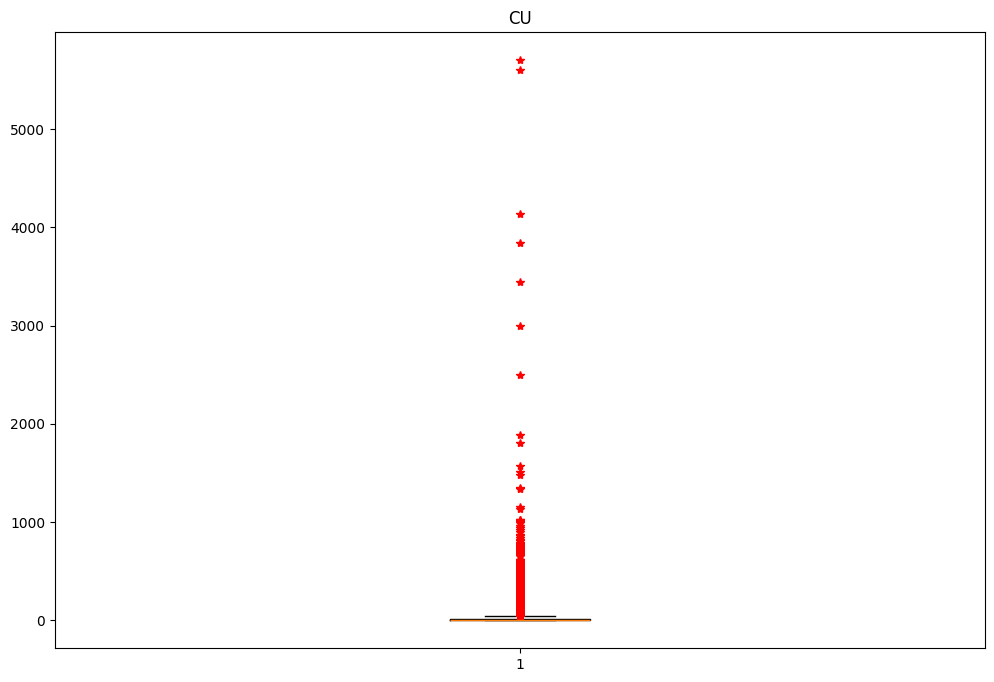

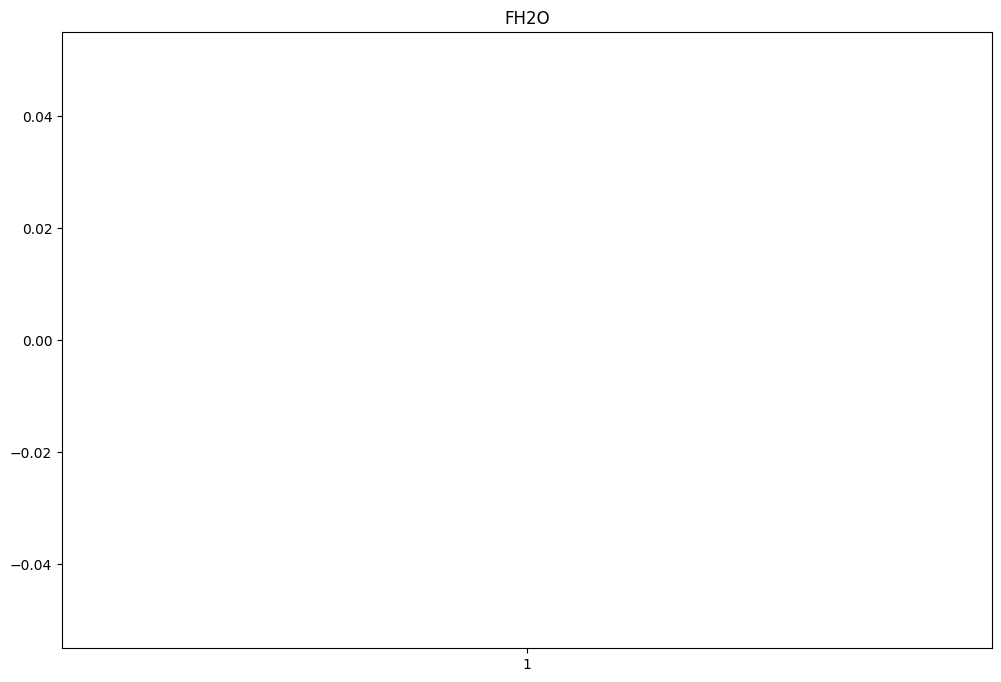

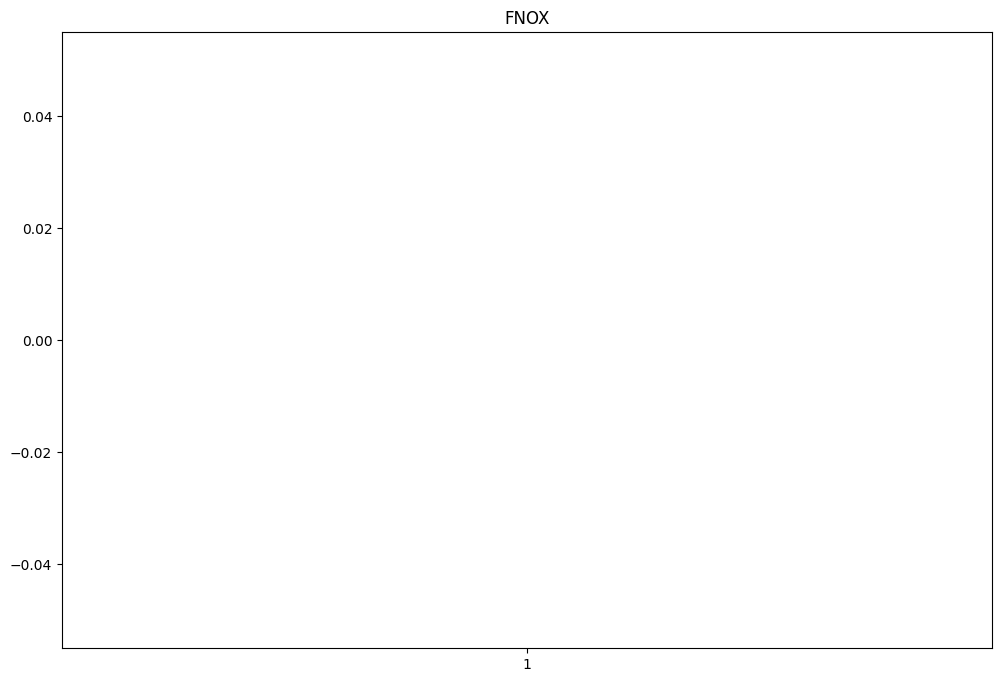

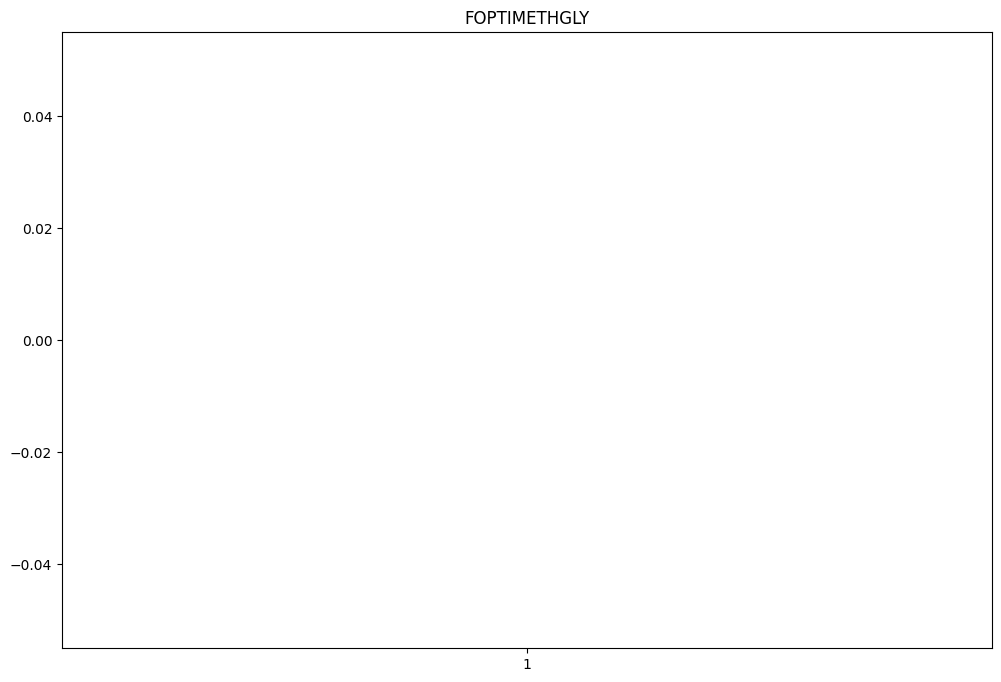

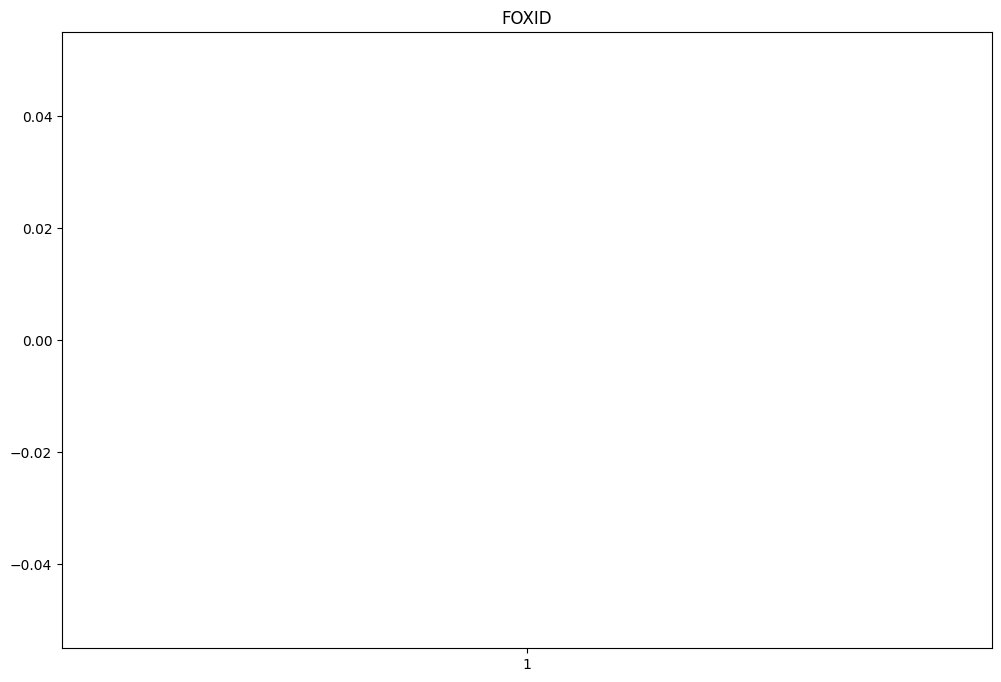

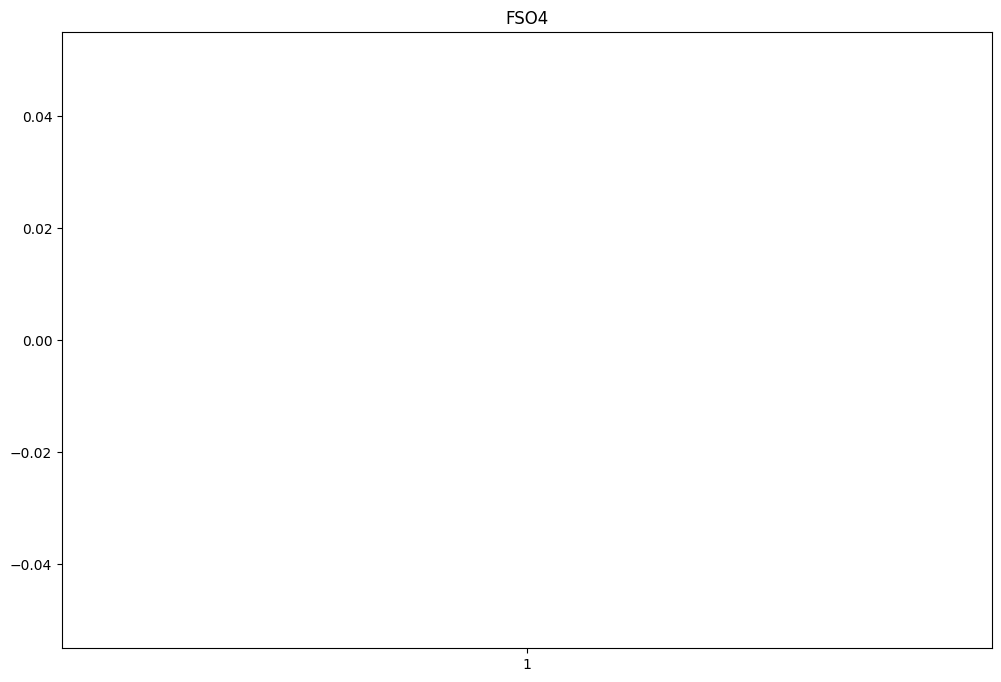

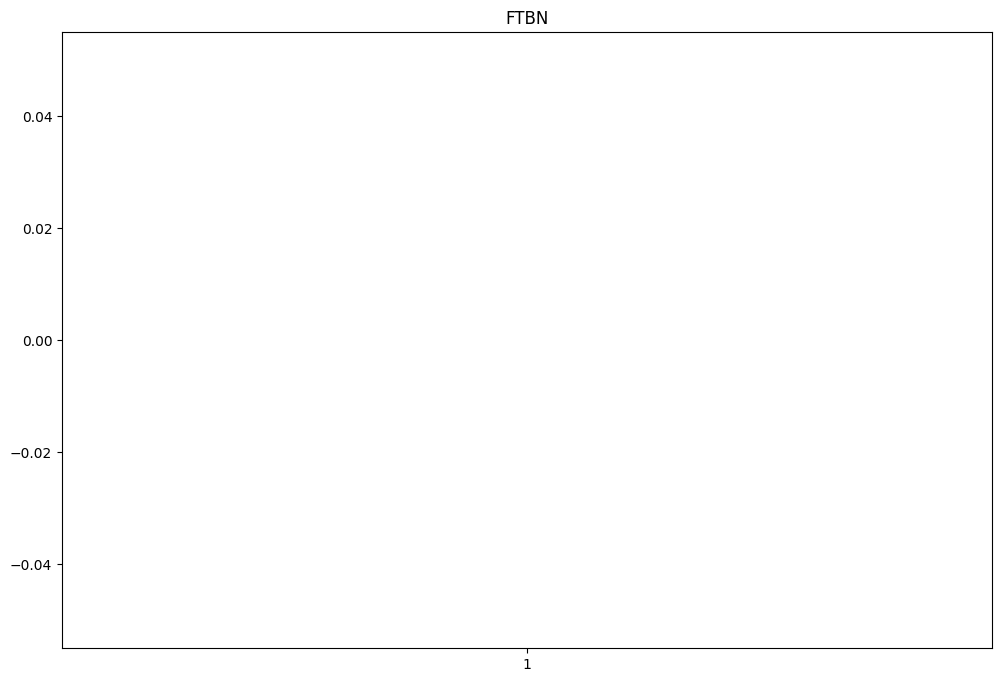

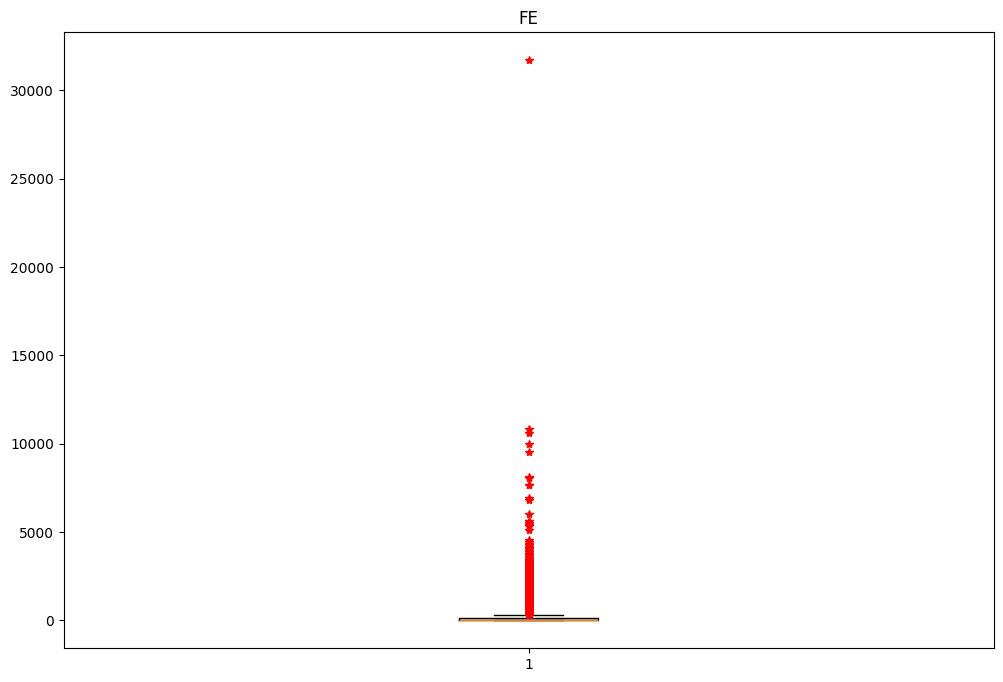

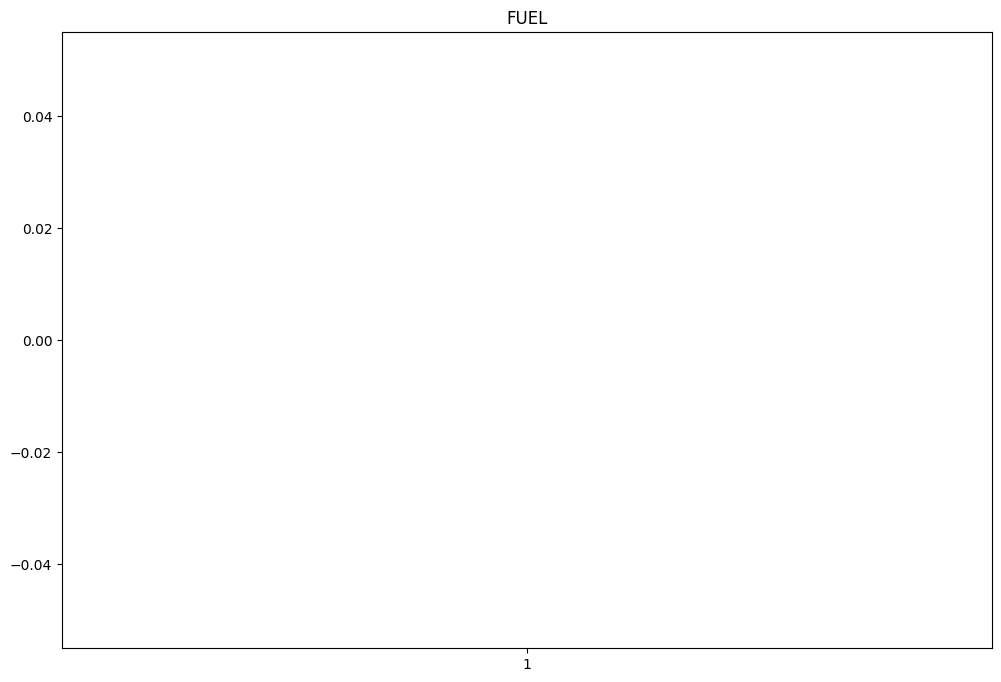

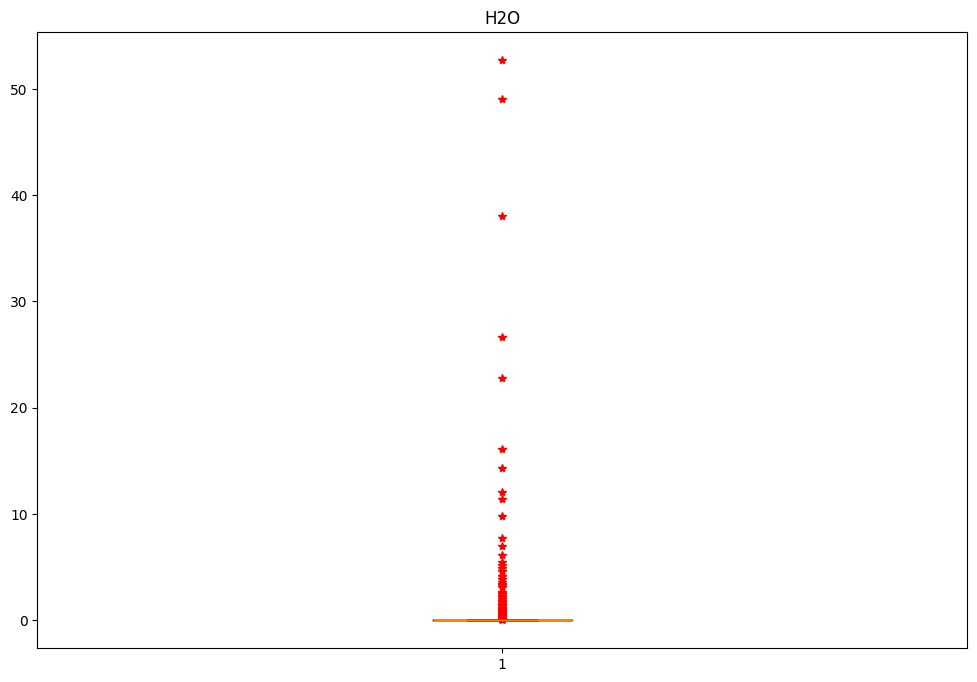

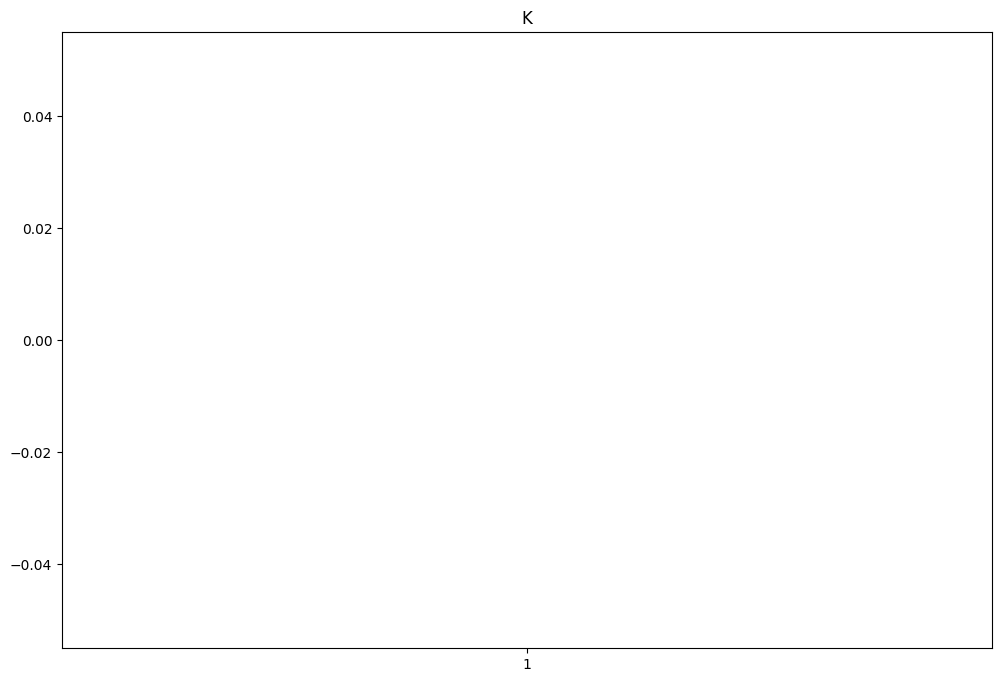

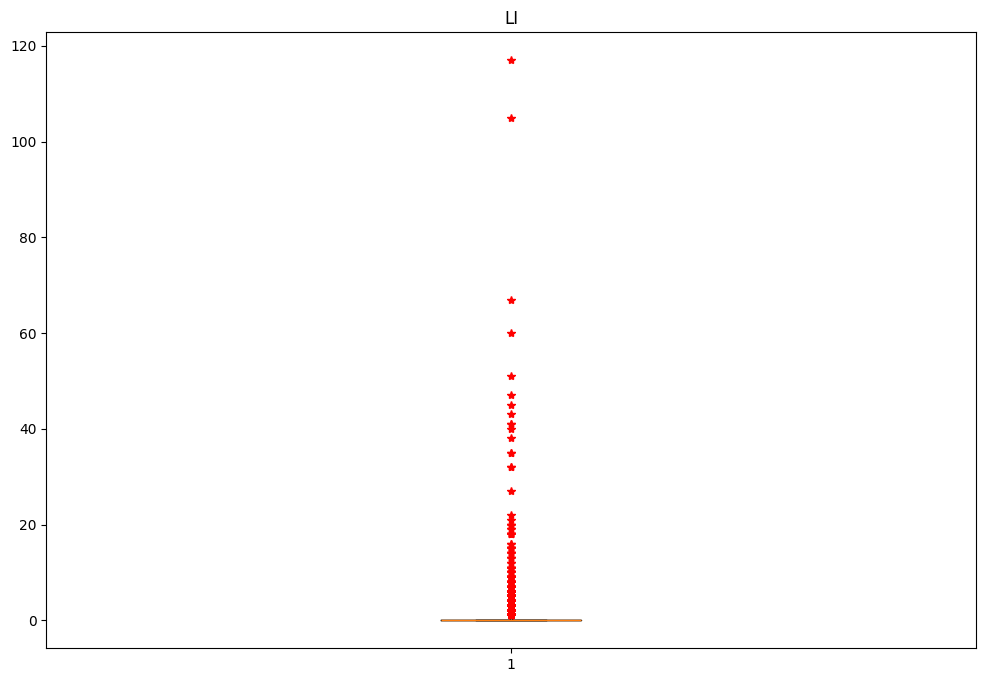

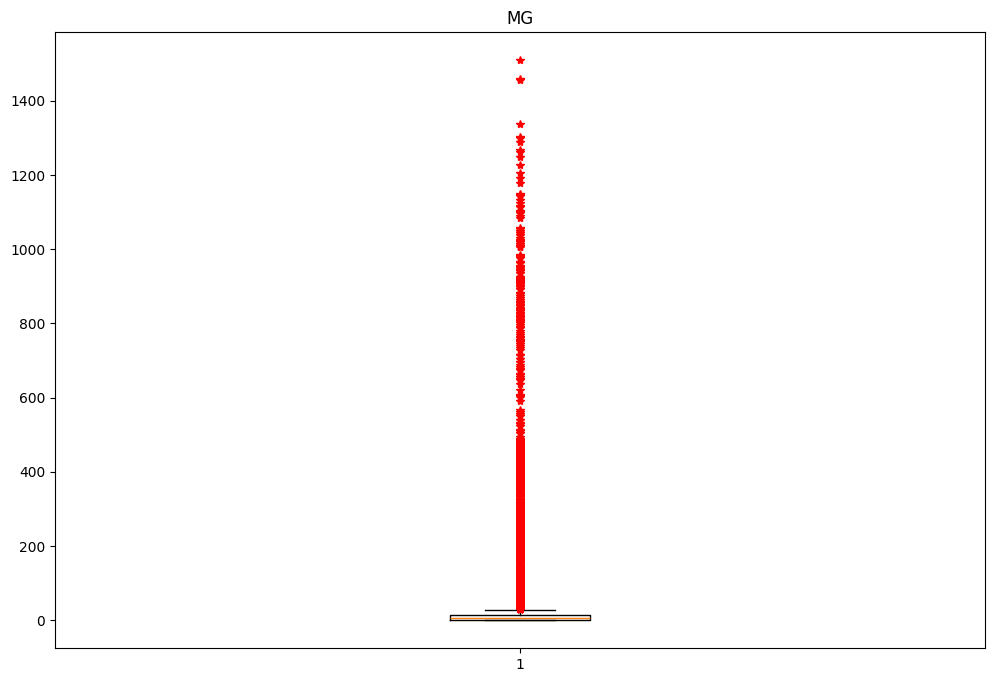

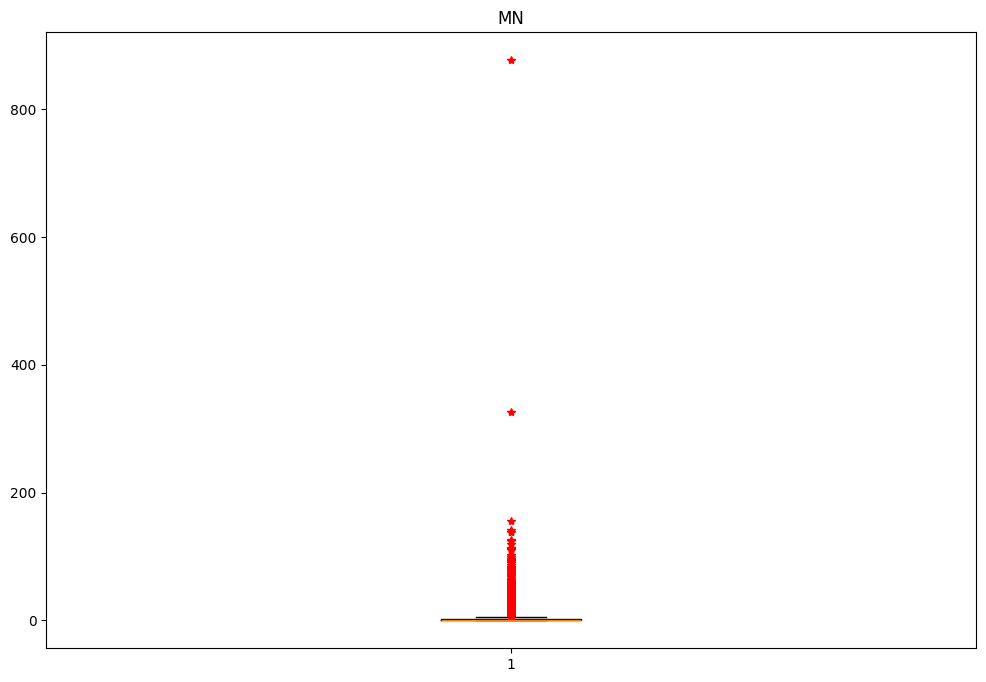

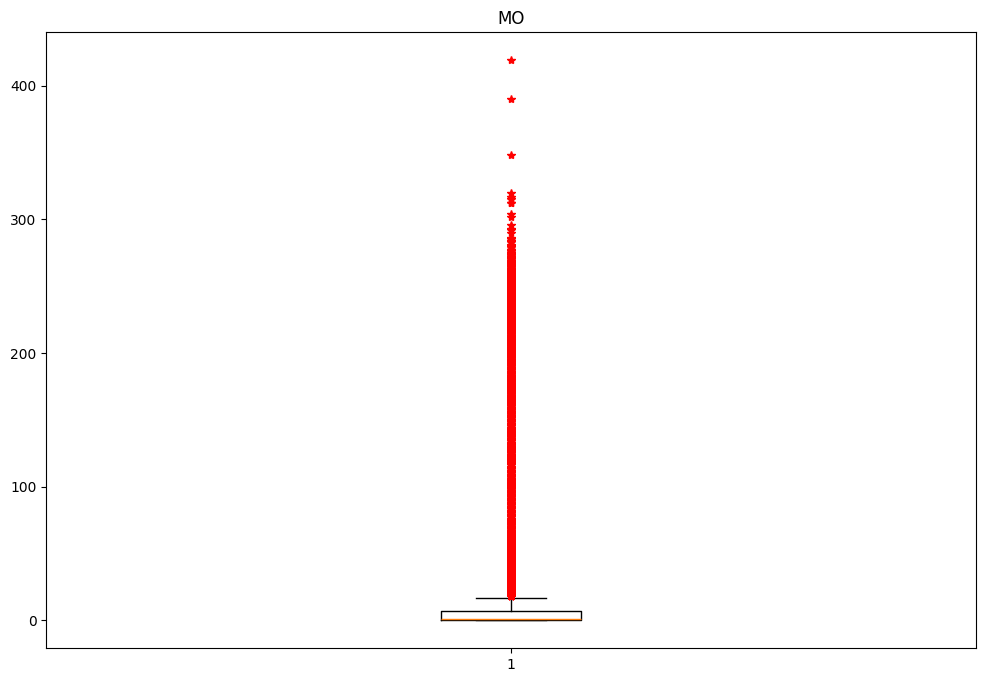

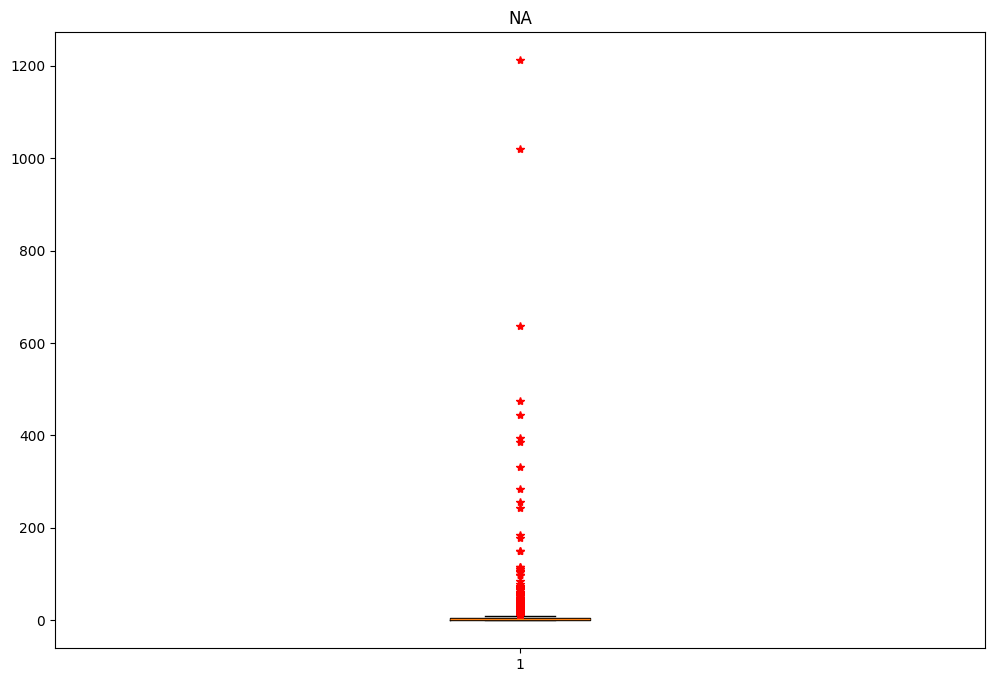

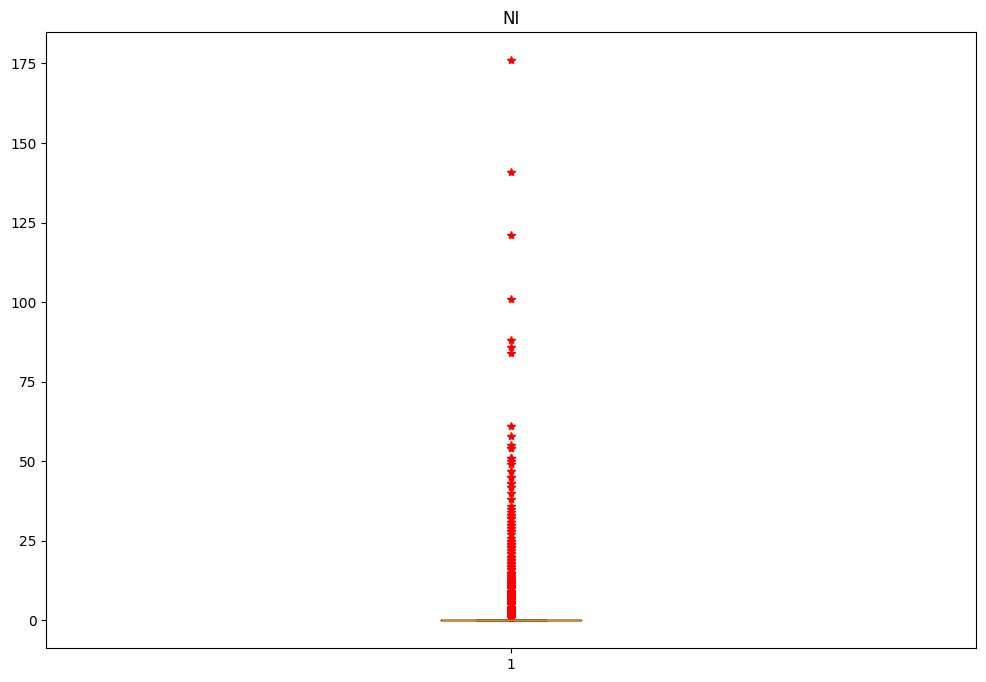

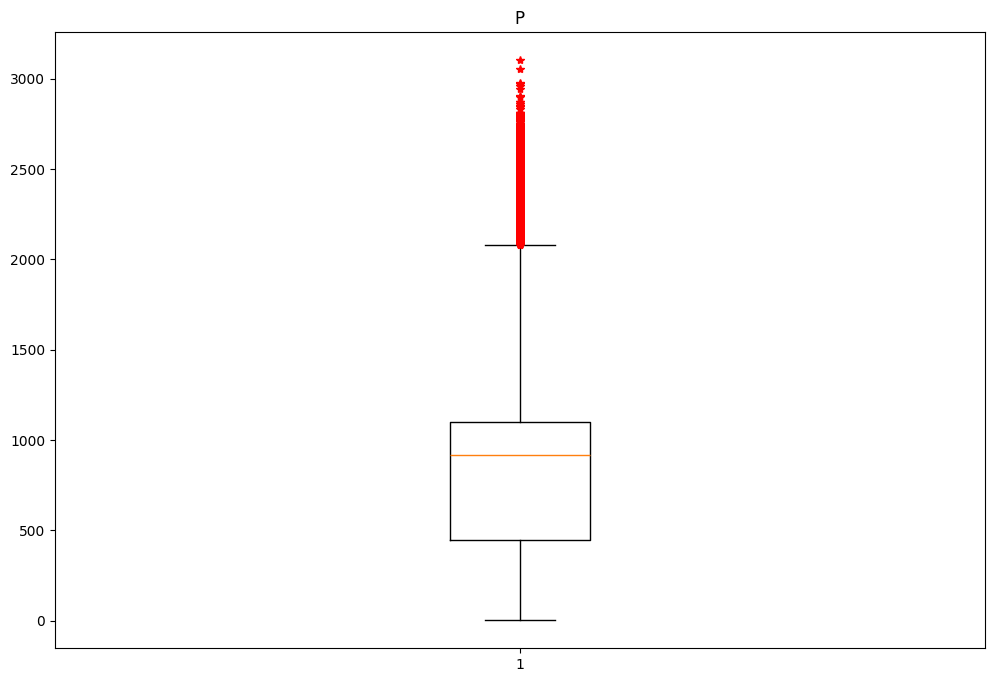

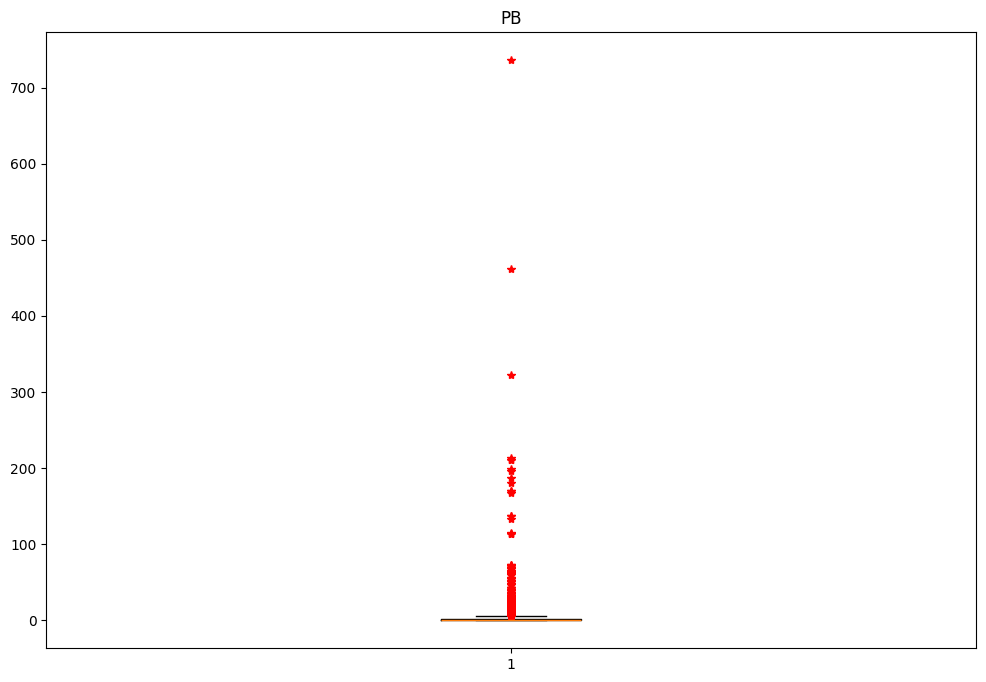

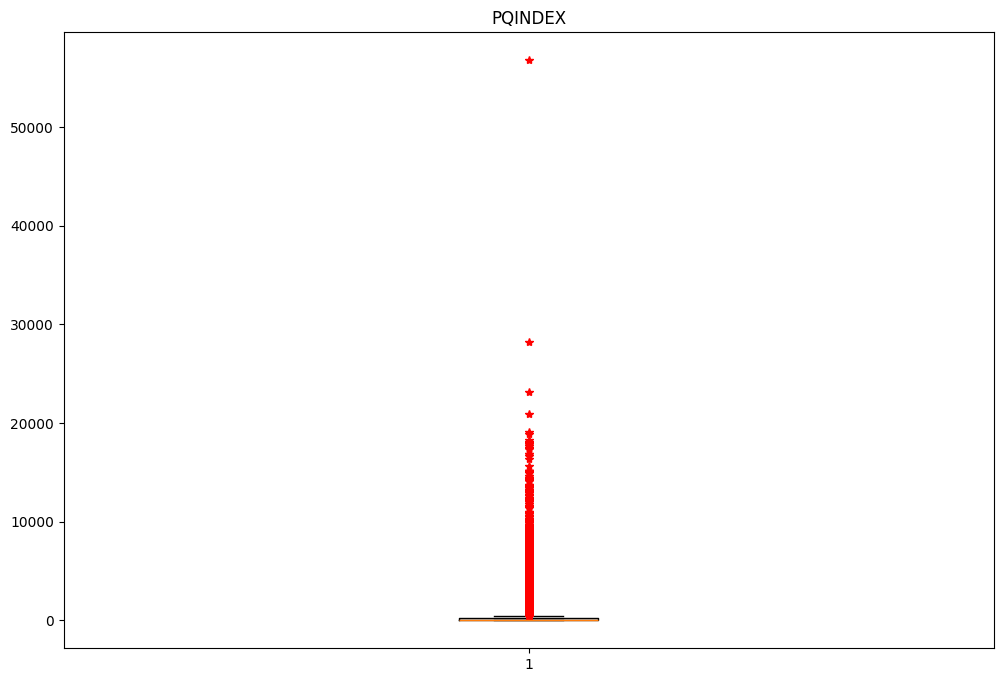

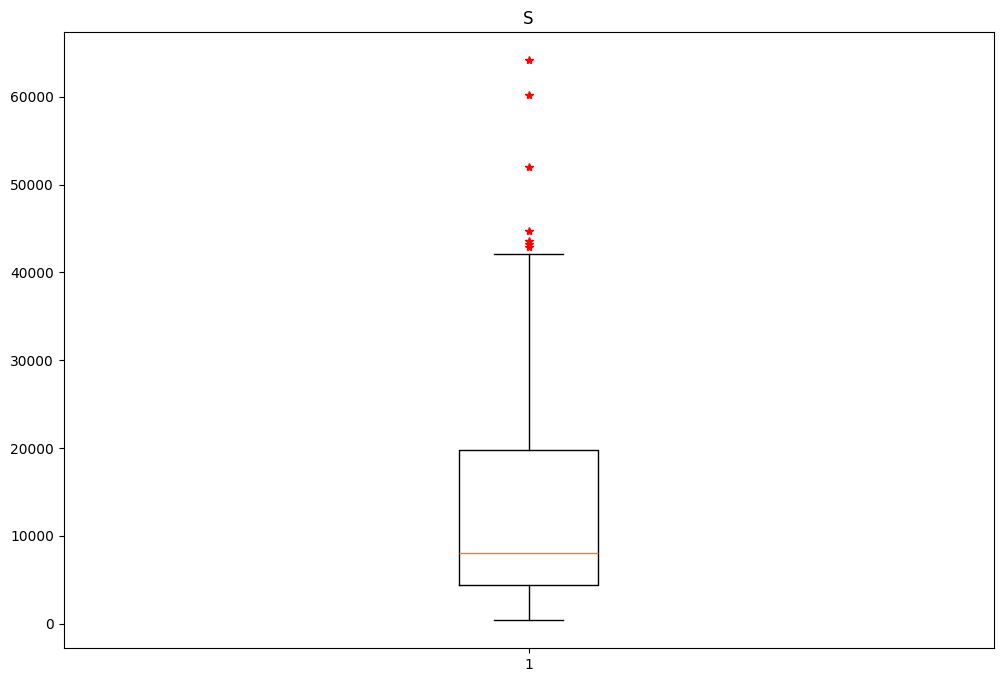

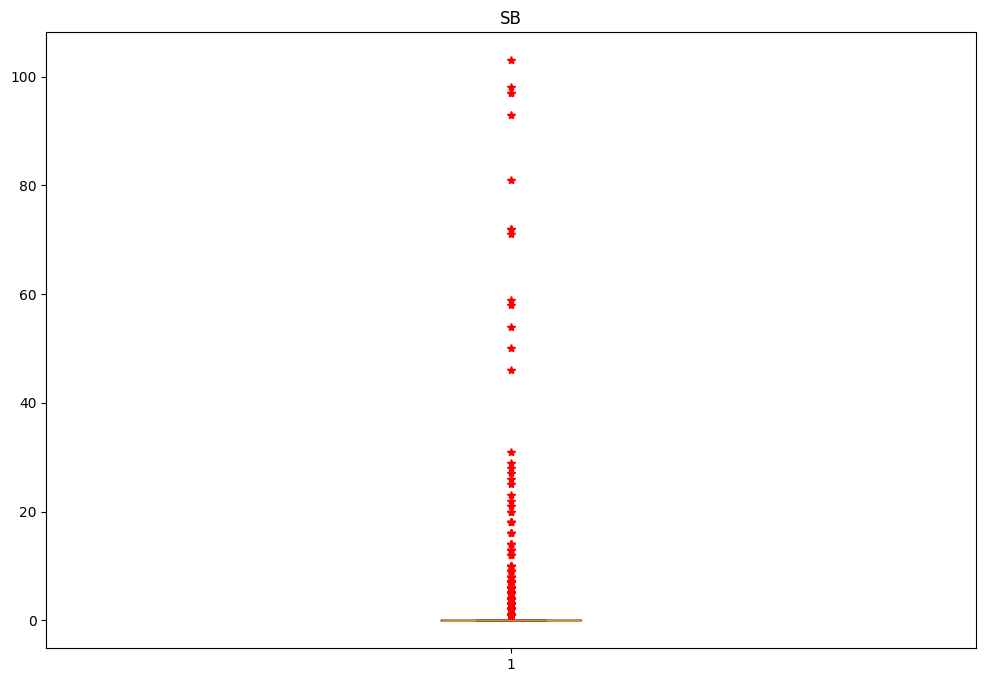

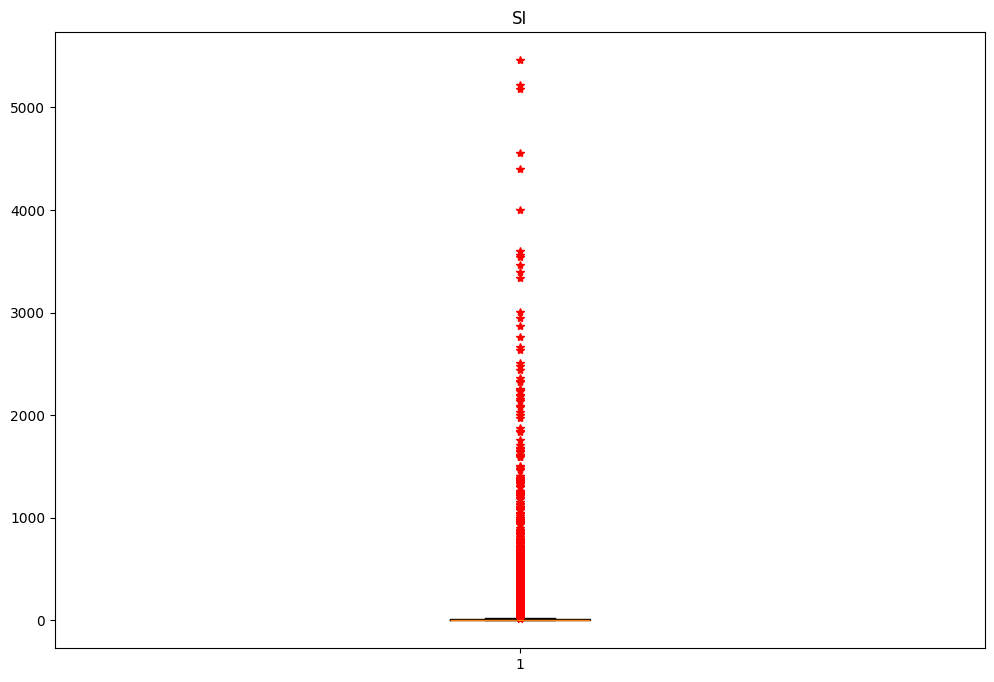

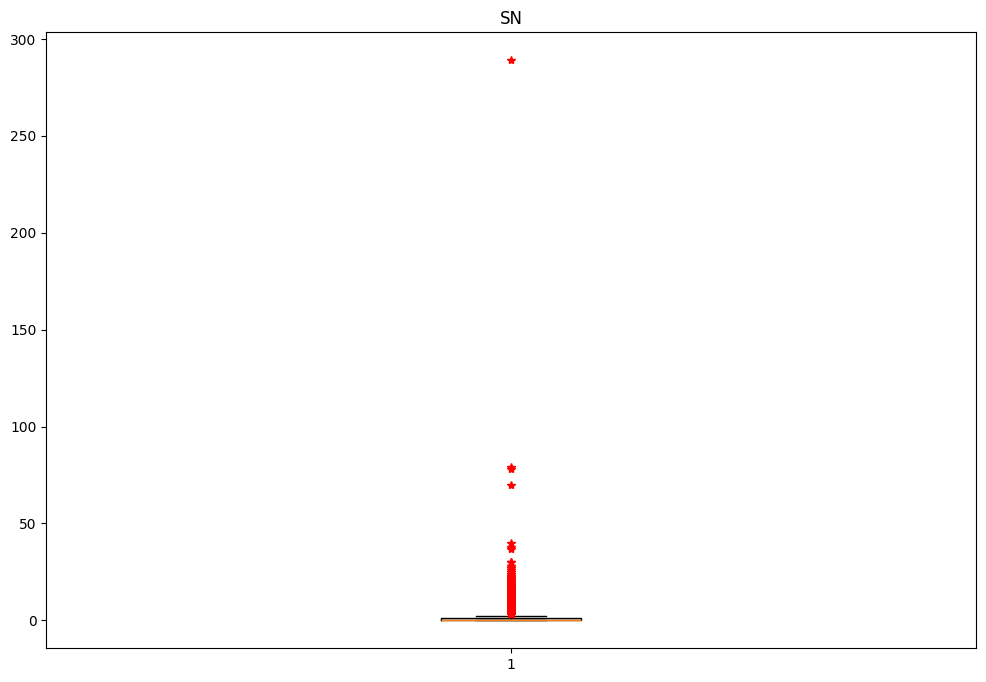

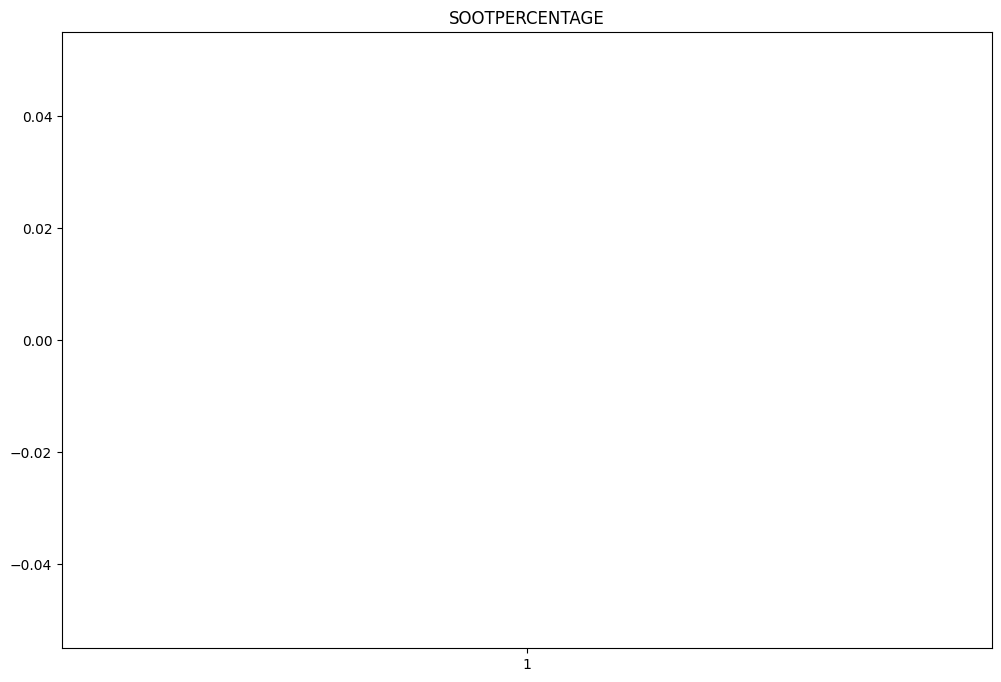

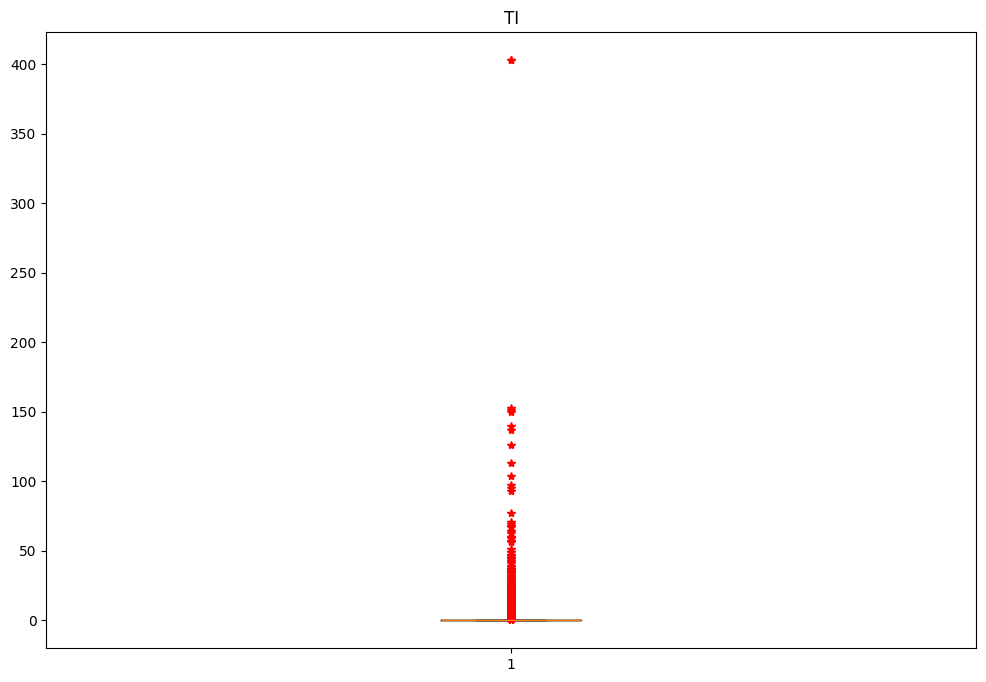

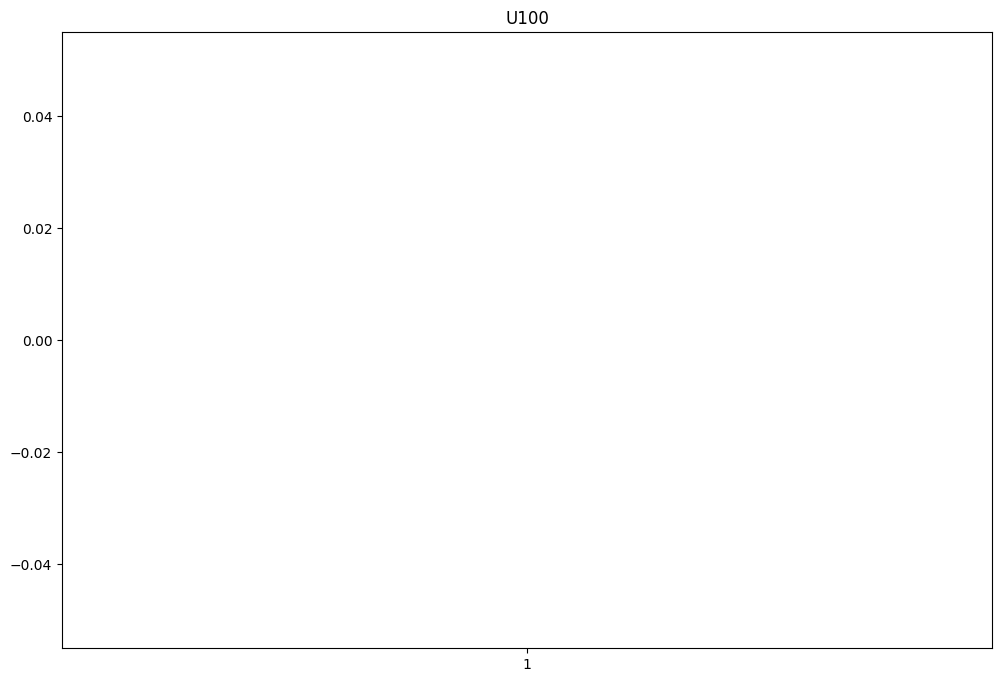

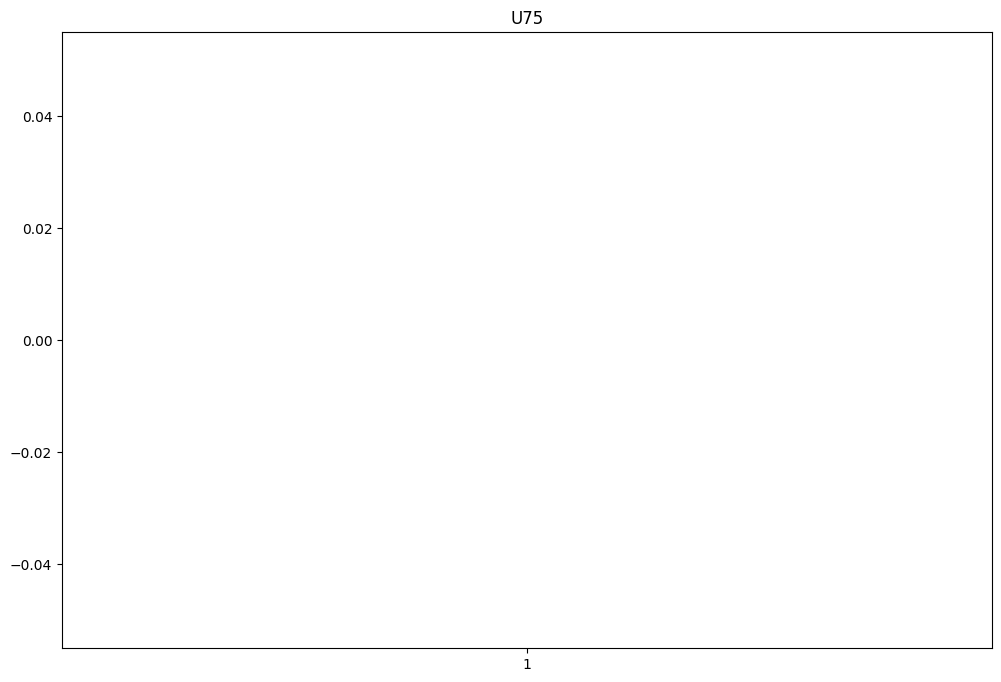

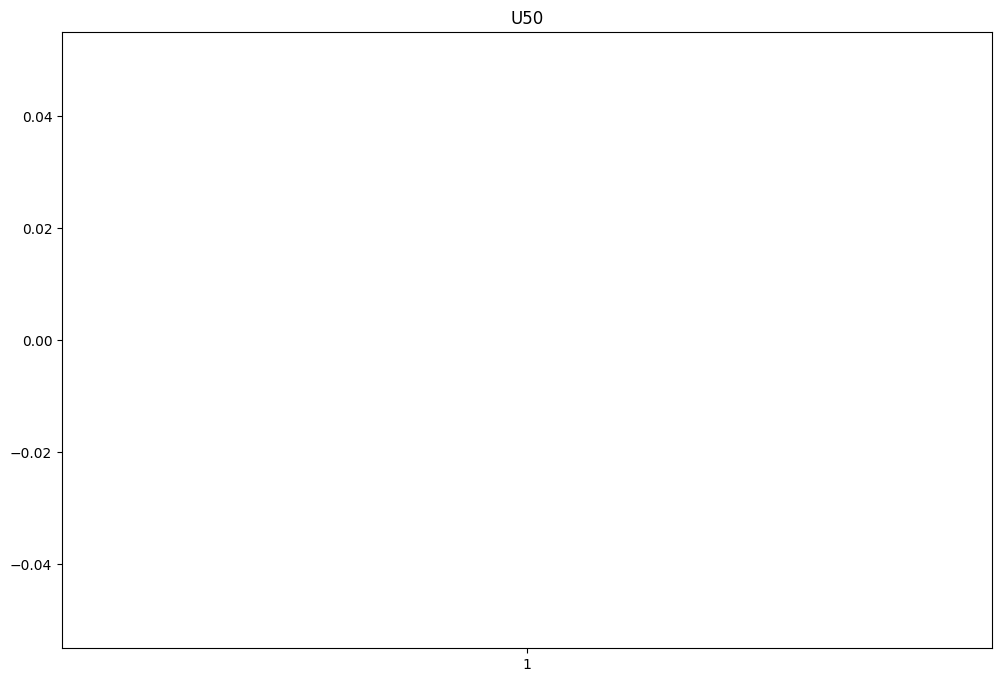

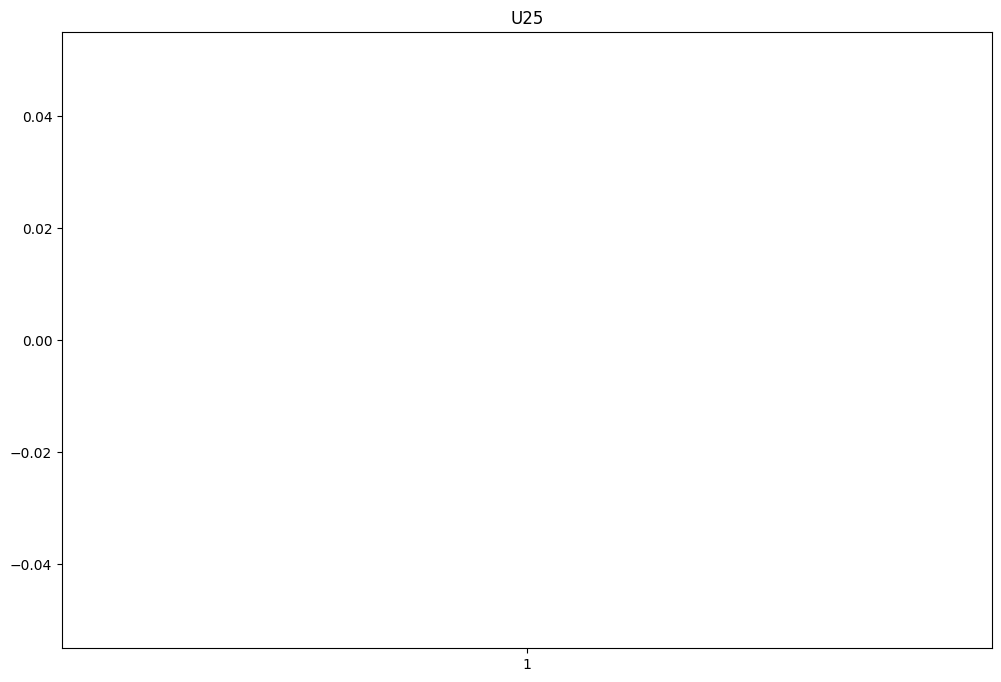

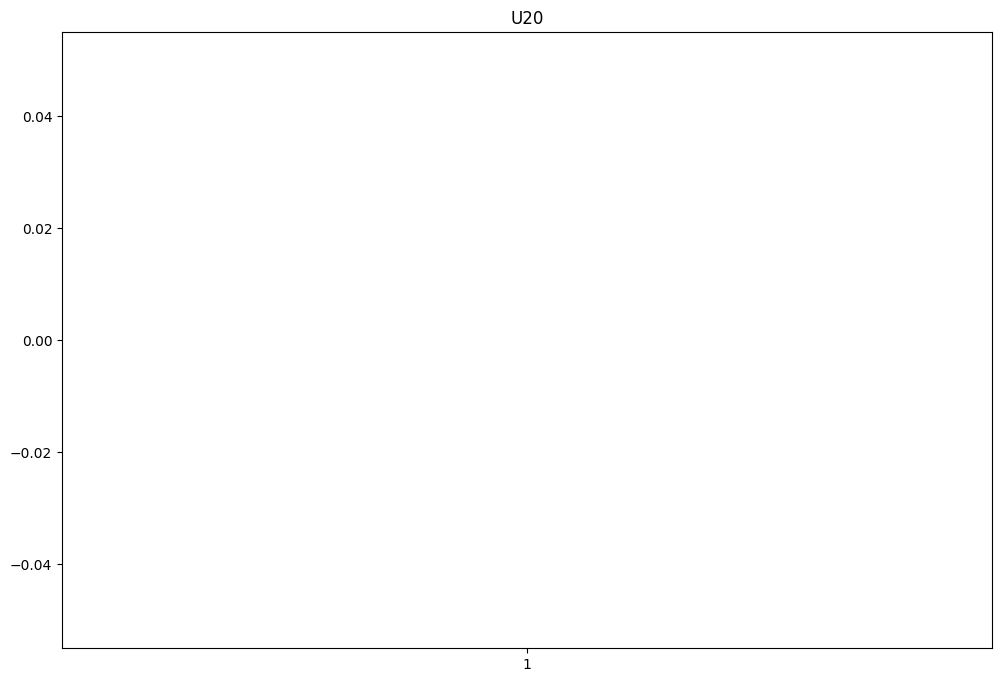

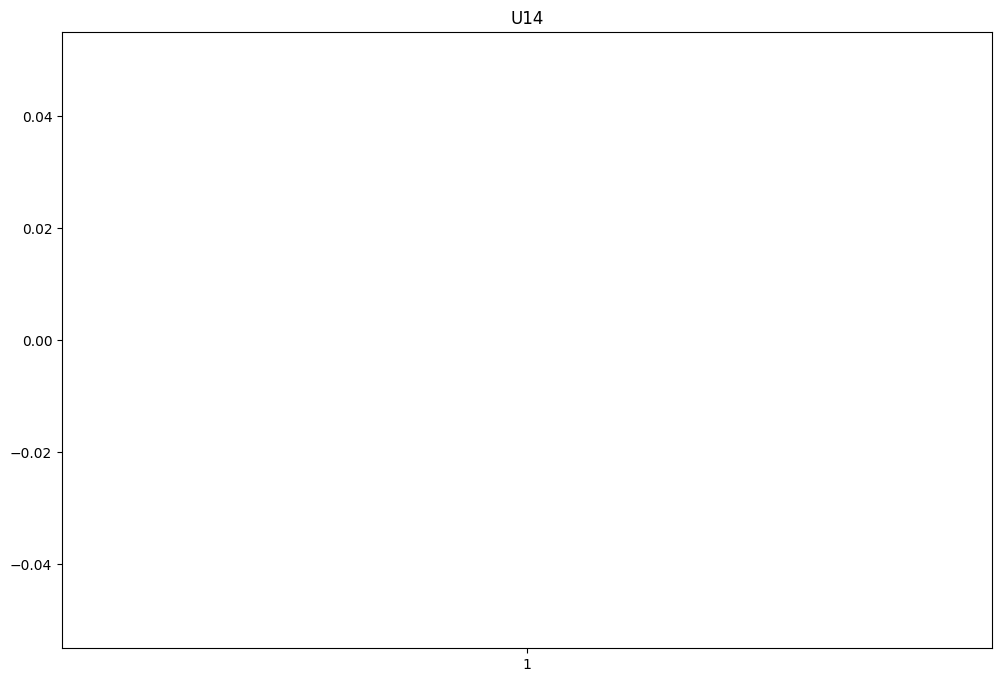

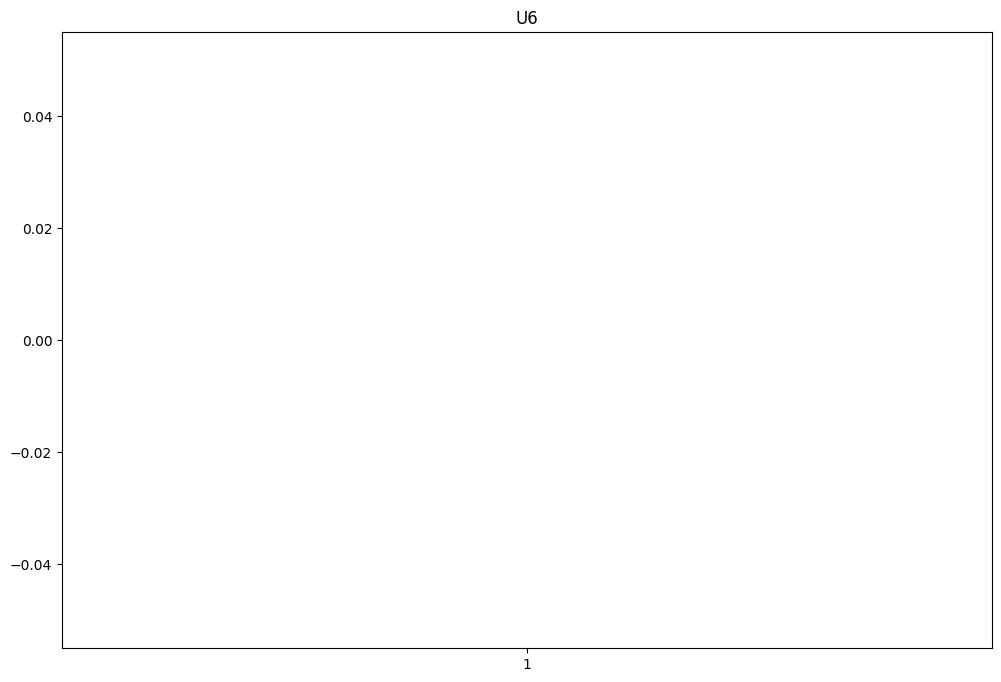

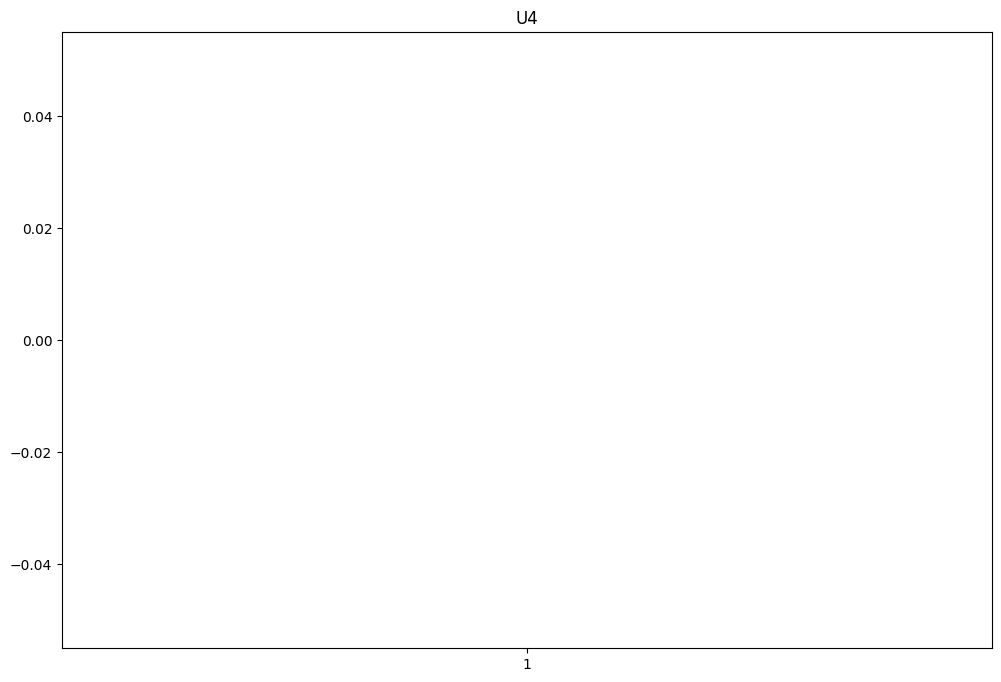

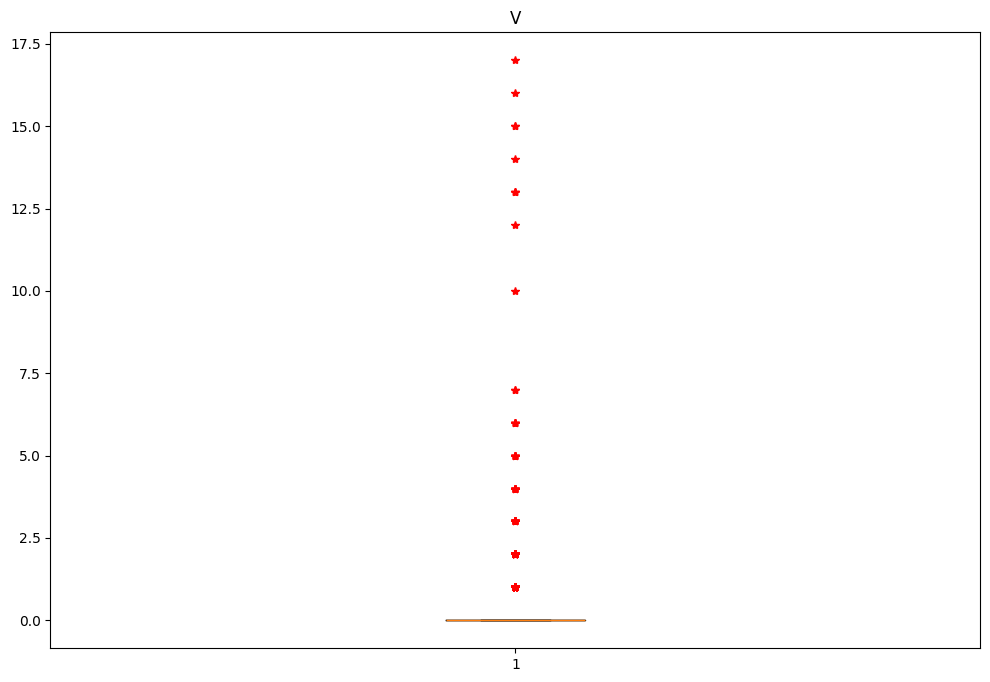

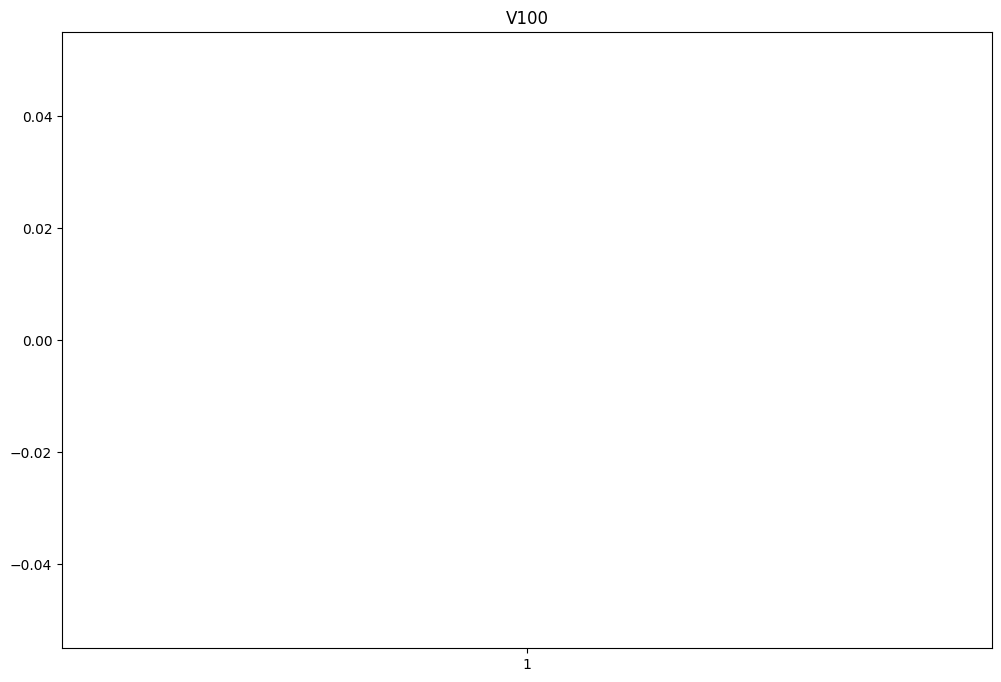

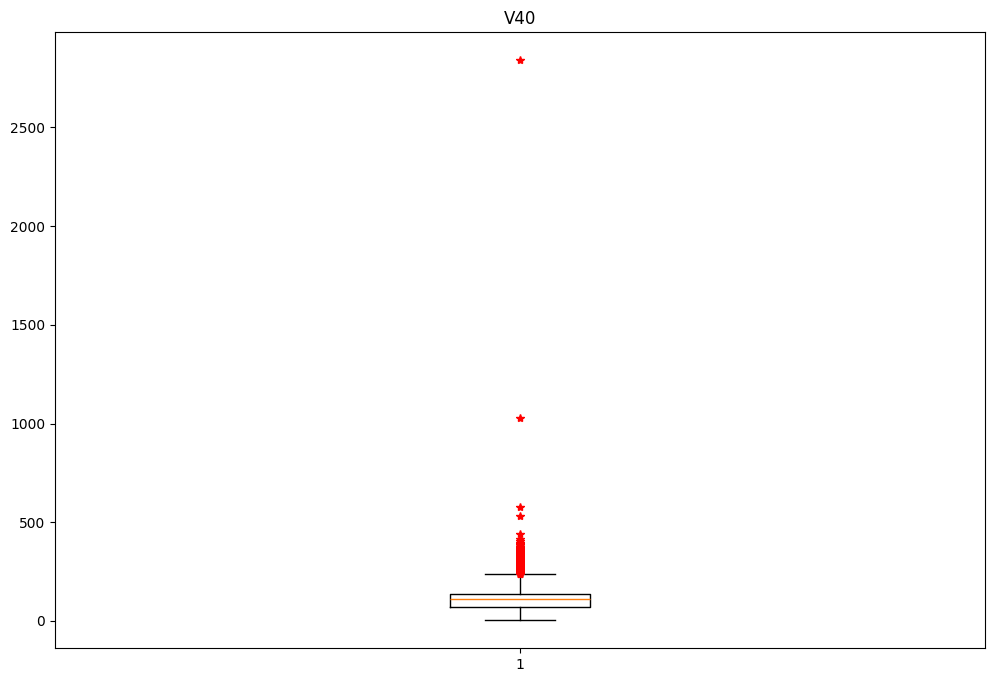

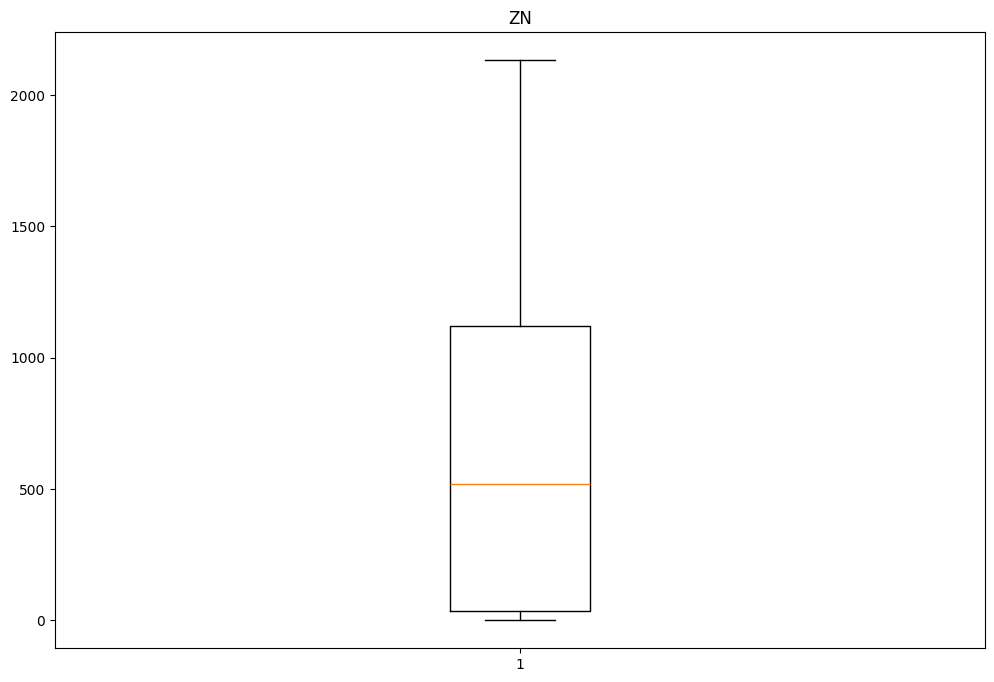

In [12]:
for col in num_feat:
    plt.figure(figsize = (12, 8))
    plt.boxplot(train[col], sym = 'r*')
    plt.title(col)
    plt.show()

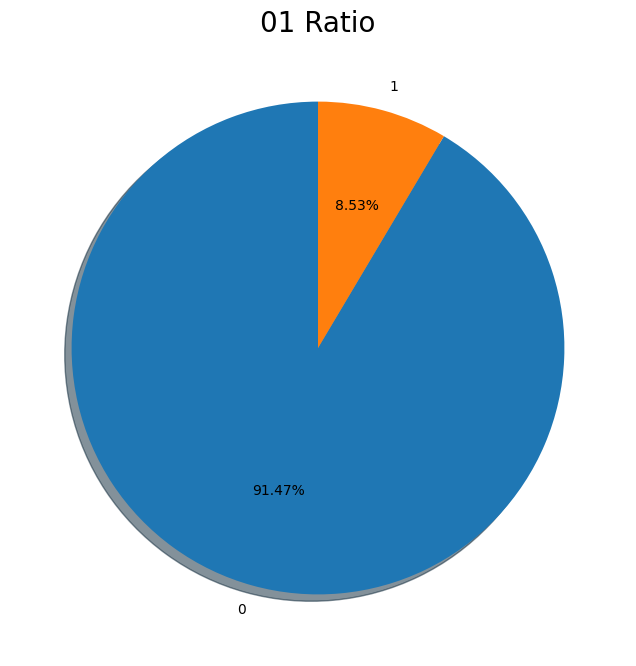

In [13]:
plt.subplots(figsize = (12, 8))
plt.pie(train['Y_LABEL'].value_counts(), labels = train['Y_LABEL'].value_counts().index,
        autopct = '%.2f%%', shadow = True, startangle = 90)
plt.title('01 Ratio', size = 20)
plt.show()

In [14]:
train_0 = train[train['Y_LABEL'] == 0]
train_1 = train[train['Y_LABEL'] == 1]

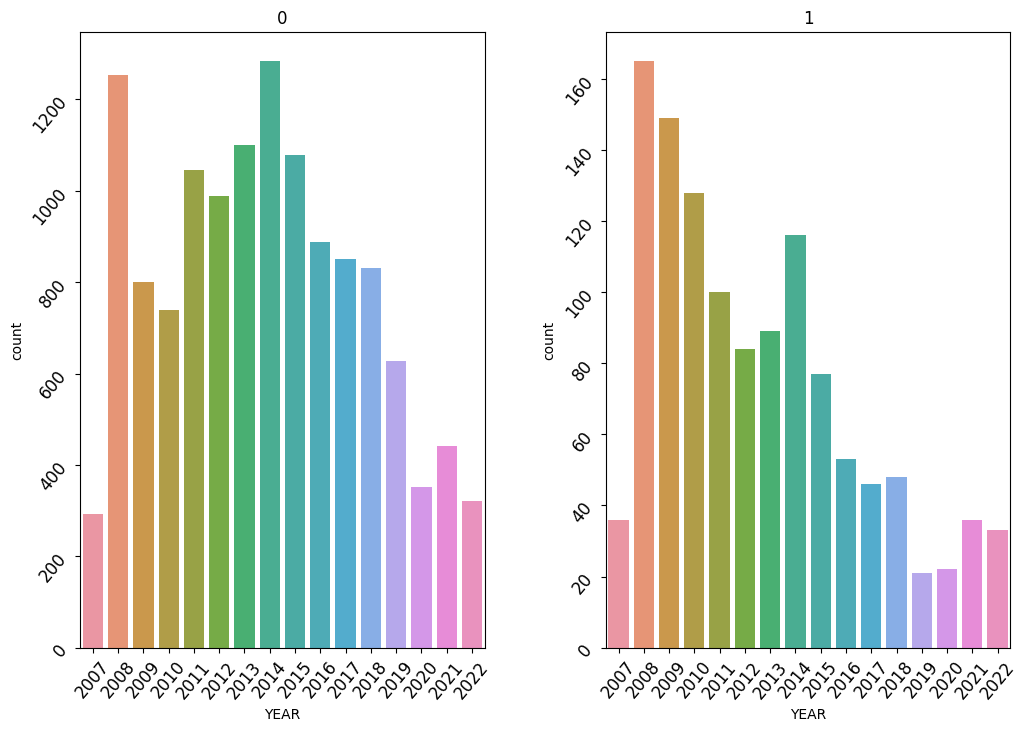

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
sns.countplot(x = 'YEAR',
              data = train_0,
              ax = ax[0])
ax[0].tick_params(labelsize = 12)
ax[0].set_title('0')
ax[0].set_ylabel('count')
ax[0].tick_params(rotation = 50)

sns.countplot(x = 'YEAR',
              data = train_1,
              ax = ax[1])
ax[1].tick_params(labelsize = 12)
ax[1].set_title('1')
ax[1].set_ylabel('count')
ax[1].tick_params(rotation = 50)

plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
plt.show()

In [16]:
def num_plot(train, train_0, train_1, column):
    fig, axes = plt.subplots(1, 2, figsize = (12, 8))

    if column in test_features:
        color = 'red'
    else:
        color = 'blue'

    sns.distplot(train_0[column], color = color,
                ax = axes[0])
    axes[0].tick_params(labelsize=12)
    axes[0].set_title('0')
    axes[0].set_ylabel('count')
    axes[0].set_xlim(None,train[column].max())

    sns.distplot(train_1[column], color = color,
                ax = axes[1])
    axes[1].tick_params(labelsize=12)
    axes[1].set_title('1')
    axes[1].set_ylabel('count')
    axes[1].set_xlim(None,train[column].max())

    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column], color = color,
C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column], color = color,


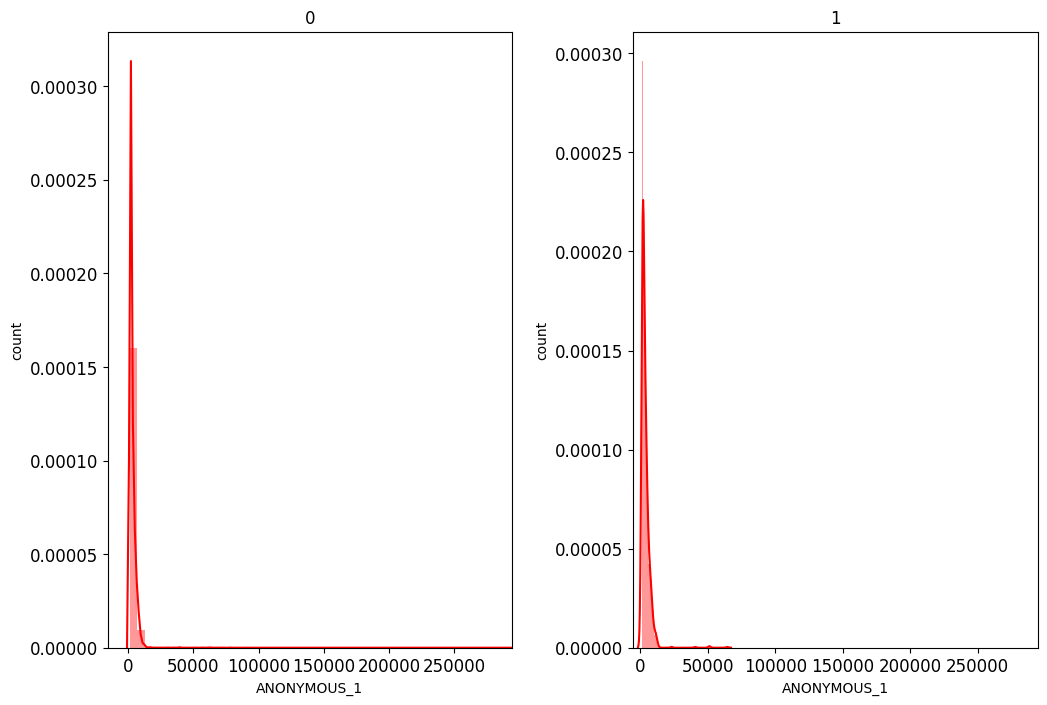

In [17]:
num_plot(train, train_0, train_1, 'ANONYMOUS_1')

C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column], color = color,
C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column], color = color,


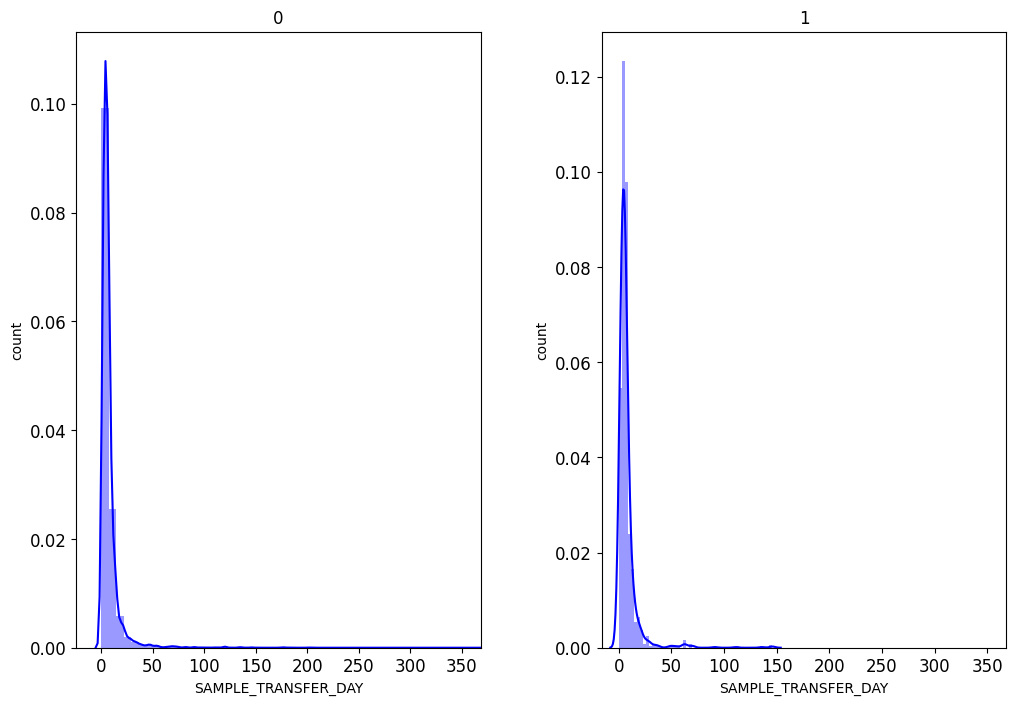

In [18]:
num_plot(train, train_0, train_1, 'SAMPLE_TRANSFER_DAY')

C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column], color = color,
C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column], color = color,


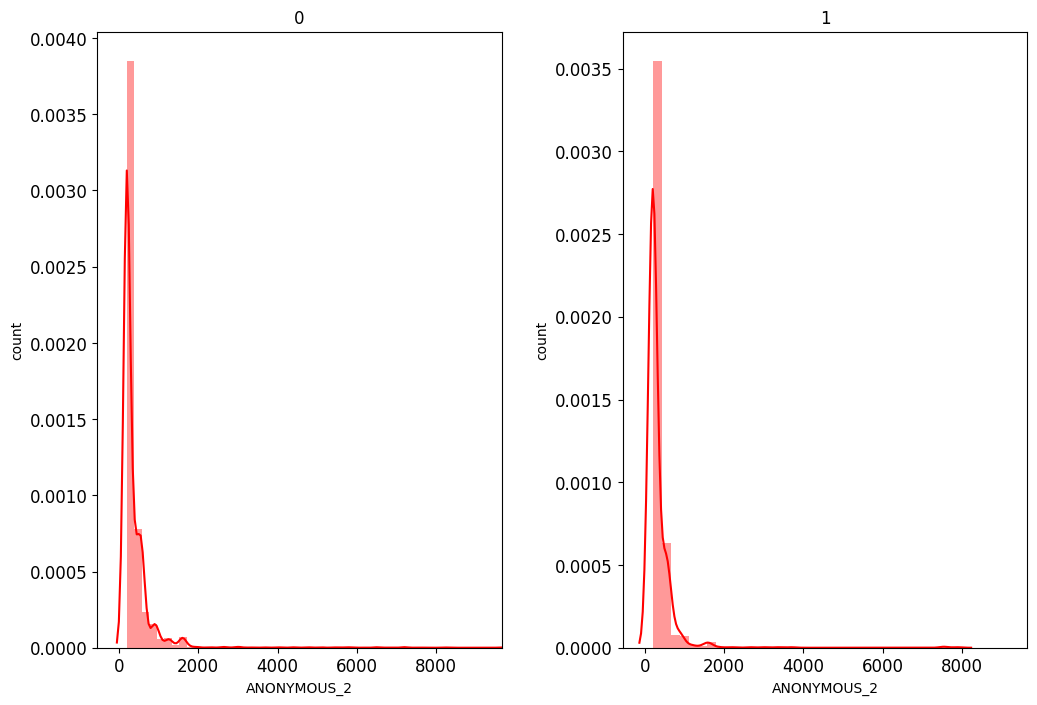

In [19]:
num_plot(train, train_0, train_1,'ANONYMOUS_2')

C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column], color = color,
C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column], color = color,


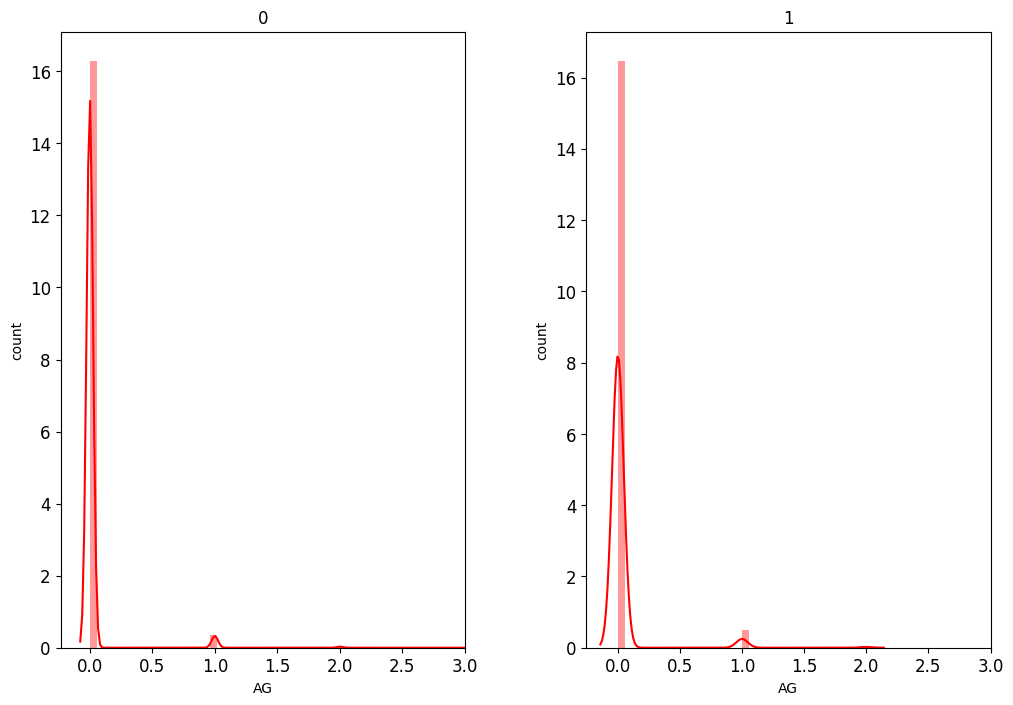

In [20]:
num_plot(train, train_0, train_1,'AG')

C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column], color = color,
C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column], color = color,


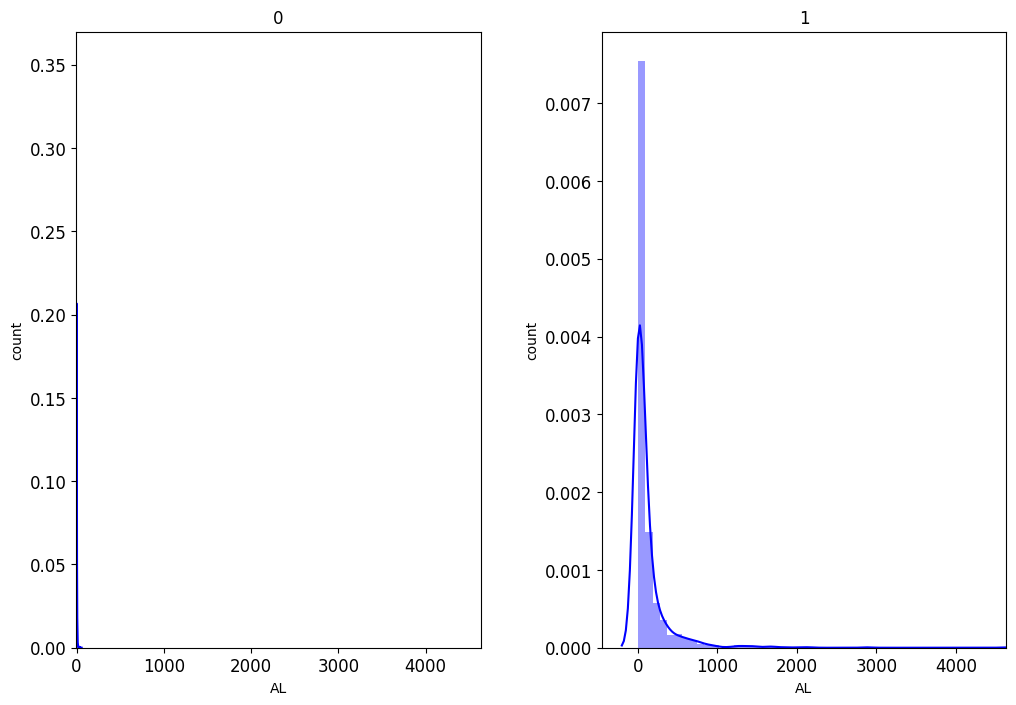

In [21]:
num_plot(train, train_0, train_1,'AL')

C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column], color = color,
C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column], color = color,


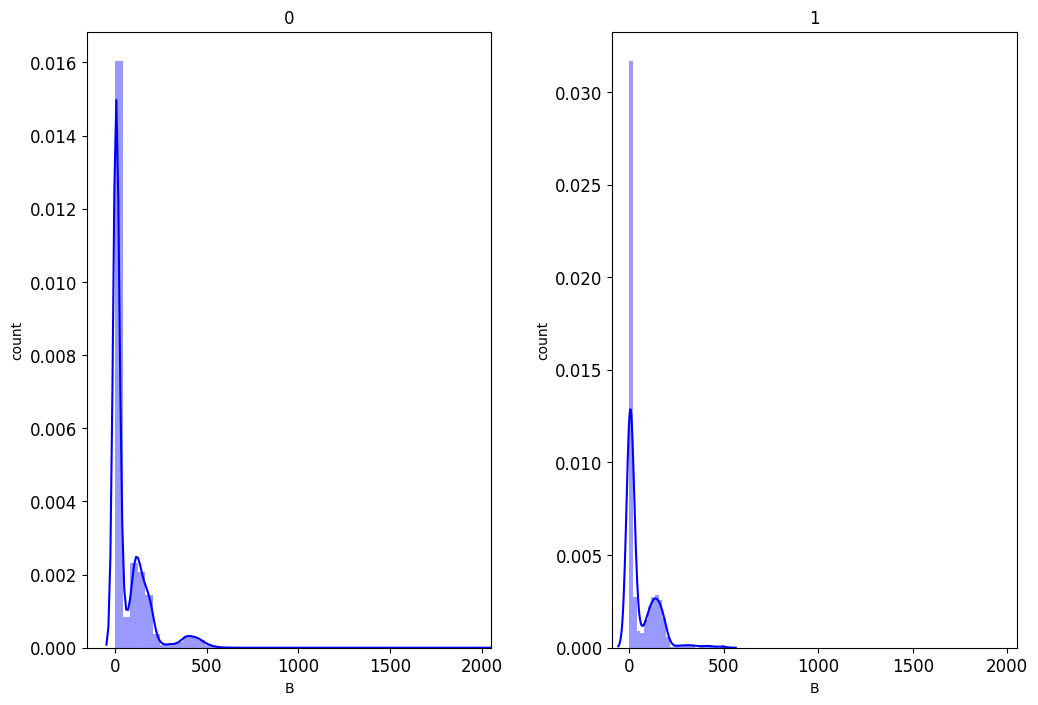

In [22]:
num_plot(train, train_0, train_1,'B')

C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column], color = color,
C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column], color = color,


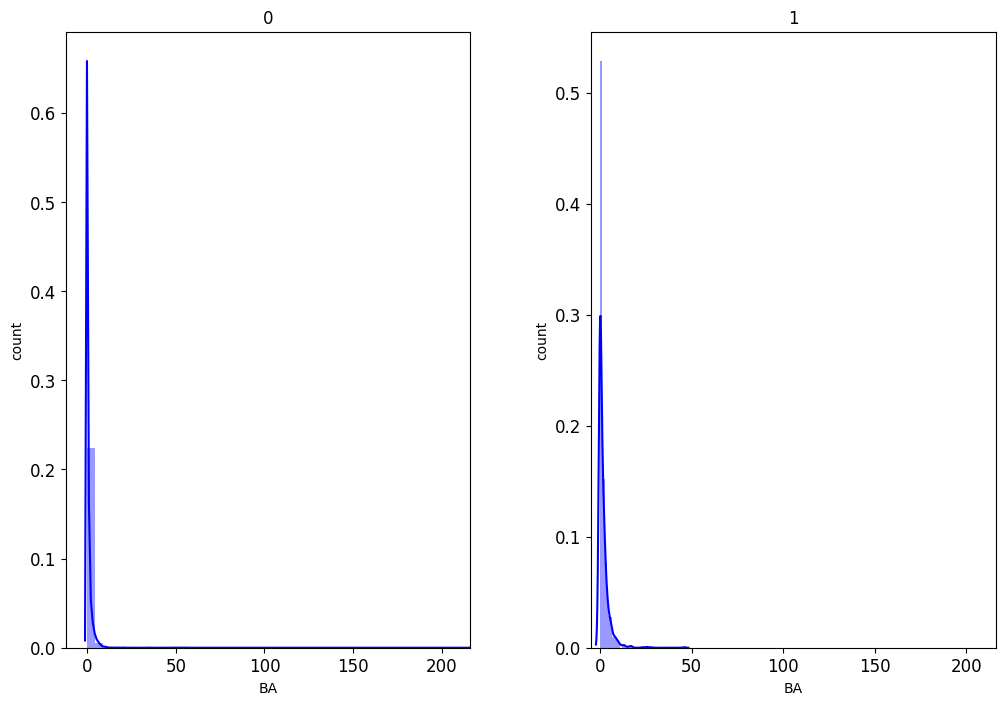

In [23]:
num_plot(train, train_0, train_1,'BA')

C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column], color = color,
C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column], color = color,


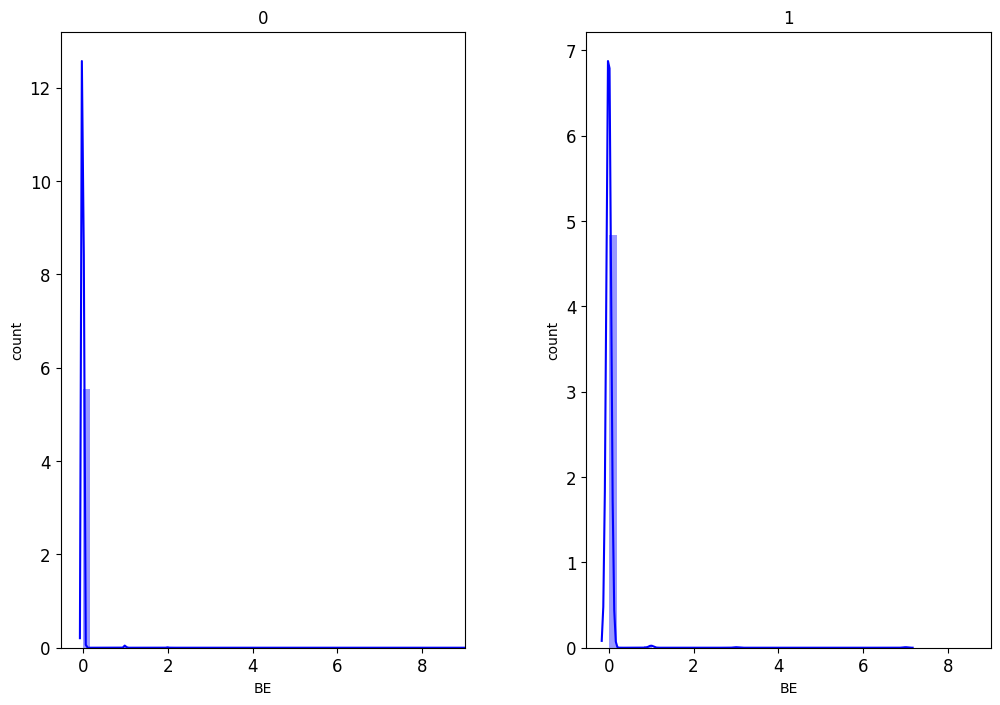

In [24]:
num_plot(train, train_0, train_1,'BE')

C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column], color = color,
C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column], color = color,


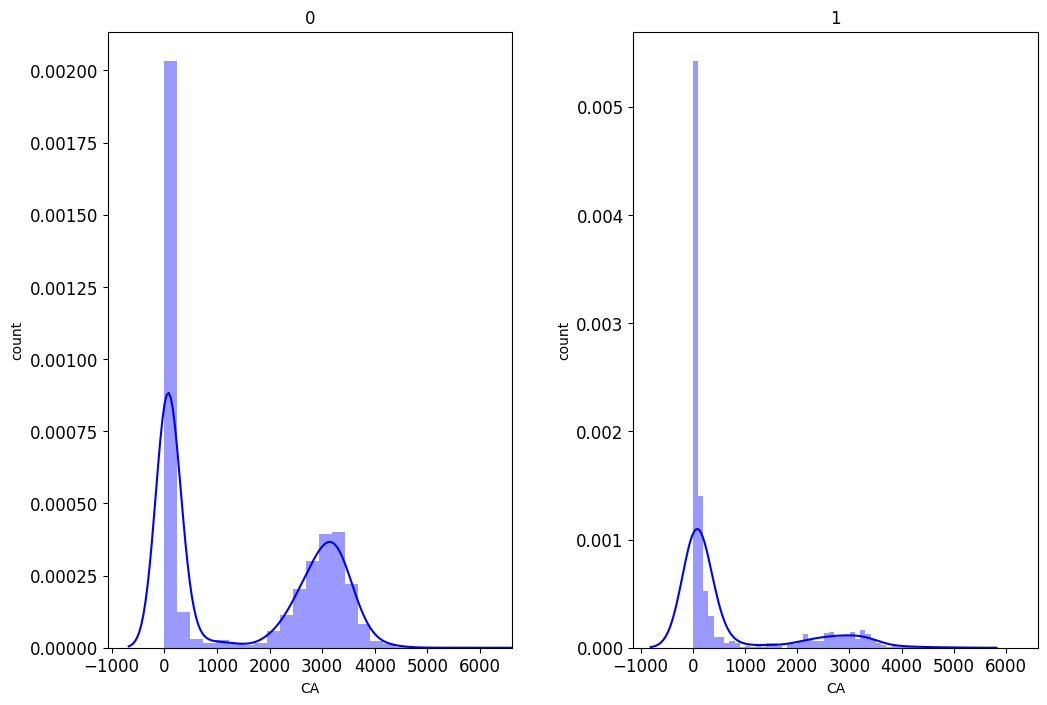

In [25]:
num_plot(train, train_0, train_1,'CA')

C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column], color = color,
C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column], color = color,


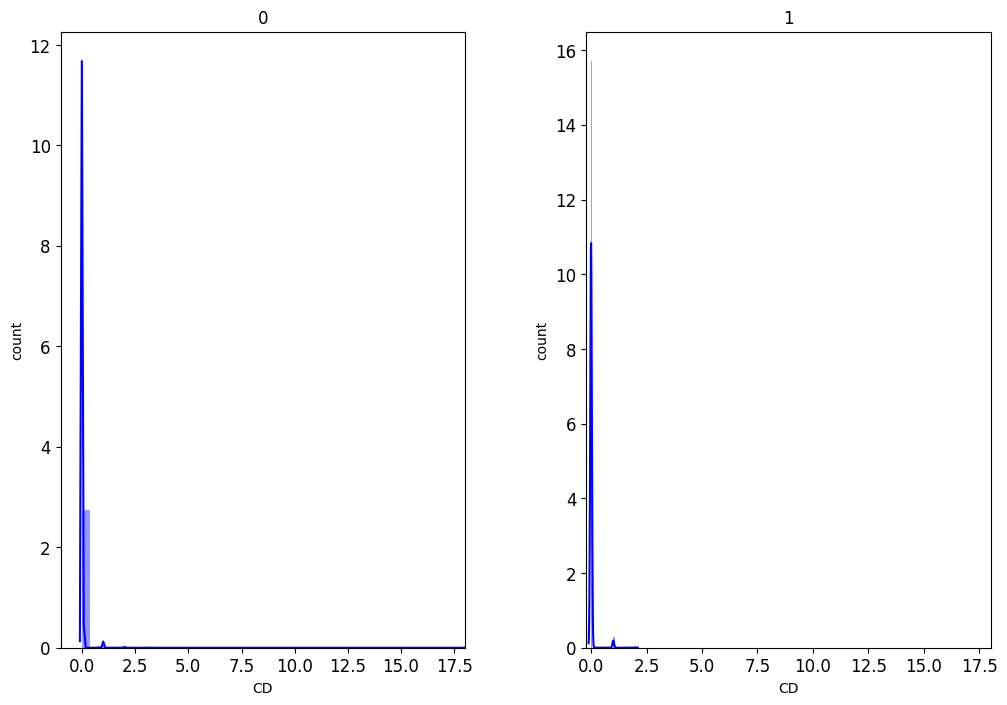

In [26]:
num_plot(train, train_0, train_1,'CD')

C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column], color = color,
C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column], color = color,


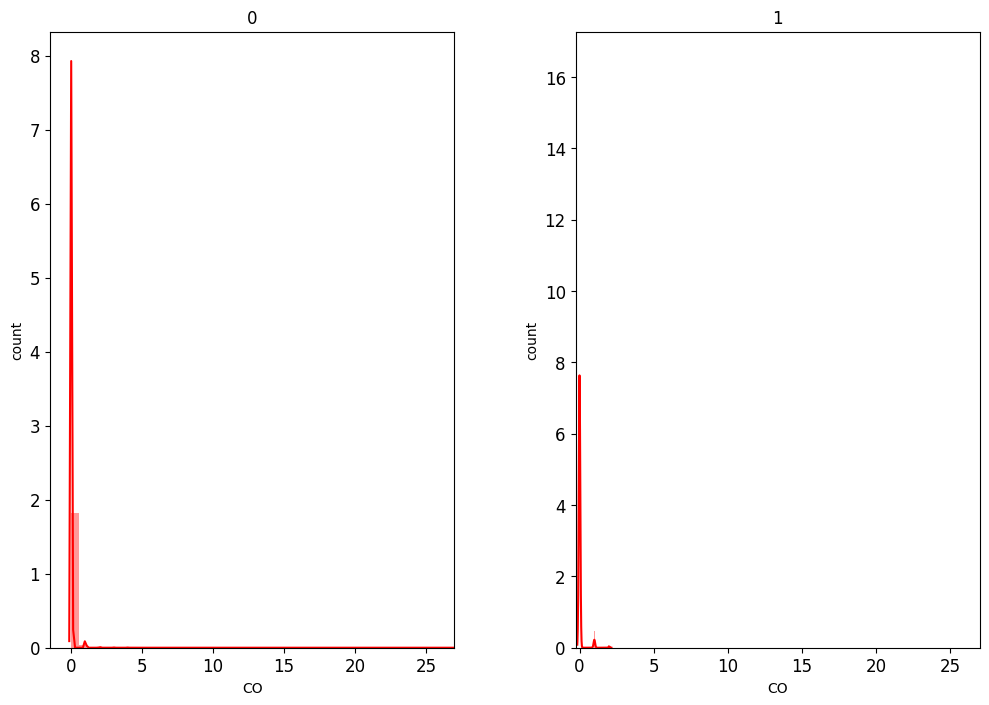

In [27]:
num_plot(train, train_0, train_1,'CO')

C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column], color = color,
C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column], color = color,


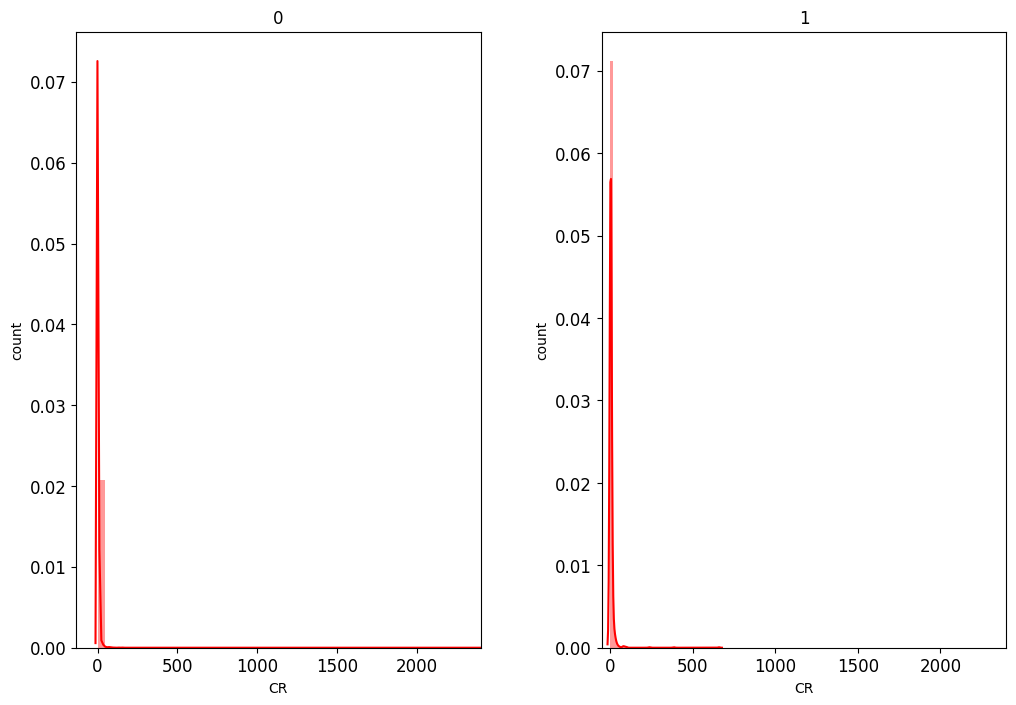

In [28]:
num_plot(train, train_0, train_1,'CR')

C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column], color = color,
C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column], color = color,


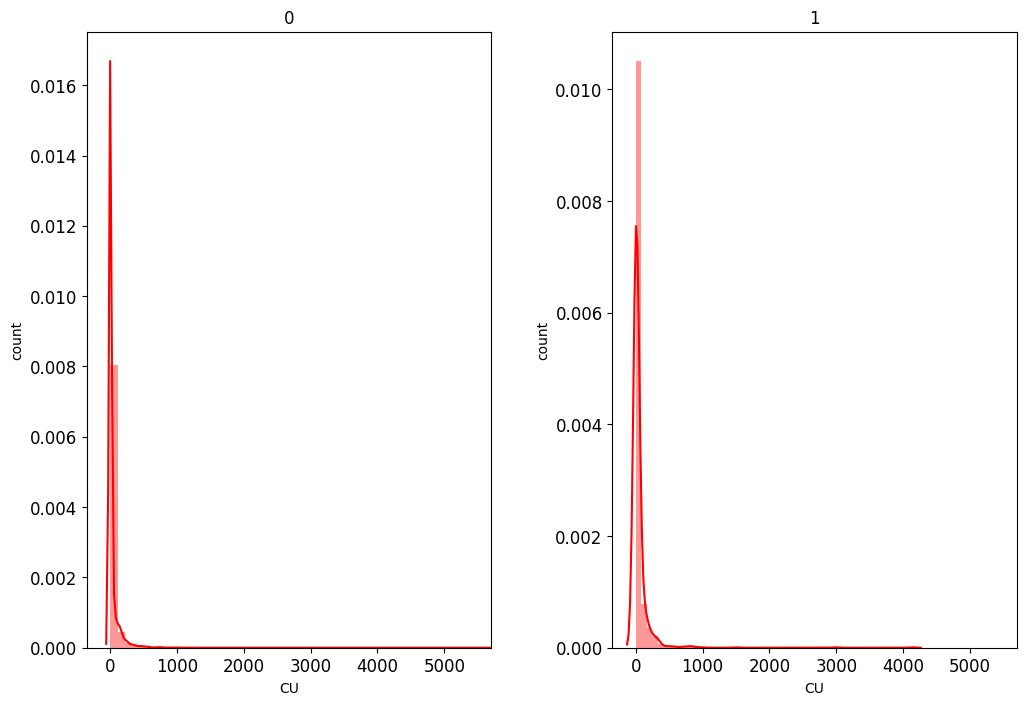

In [29]:
num_plot(train, train_0, train_1,'CU')

C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column], color = color,
C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column], color = color,


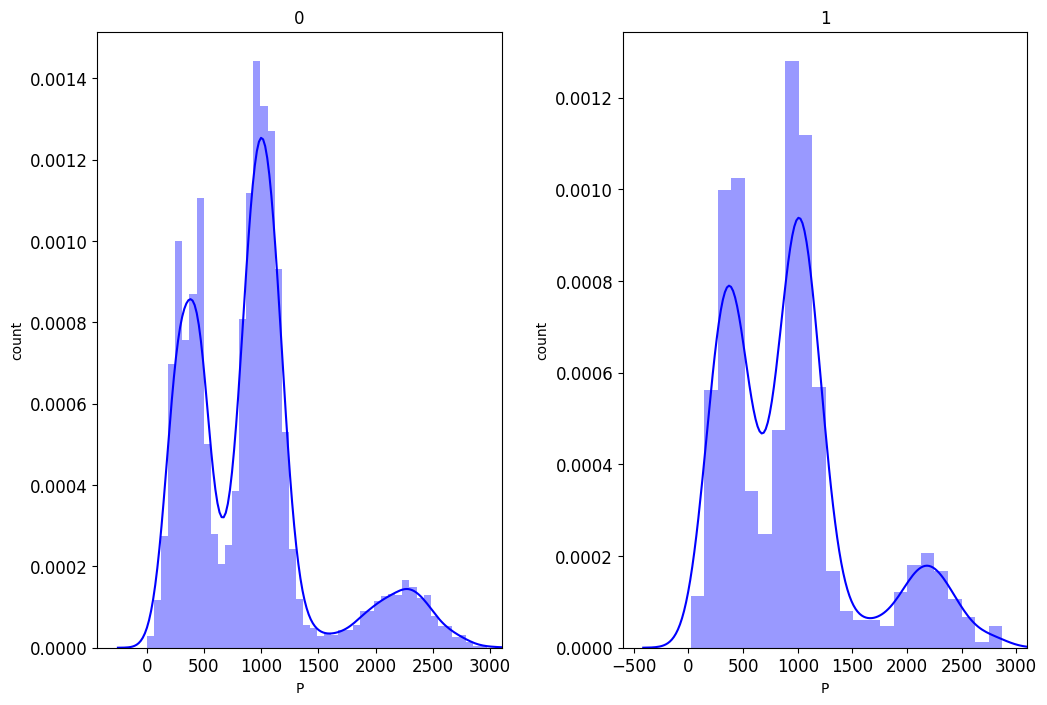

In [30]:
num_plot(train, train_0, train_1,'P')

C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column], color = color,
C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column], color = color,


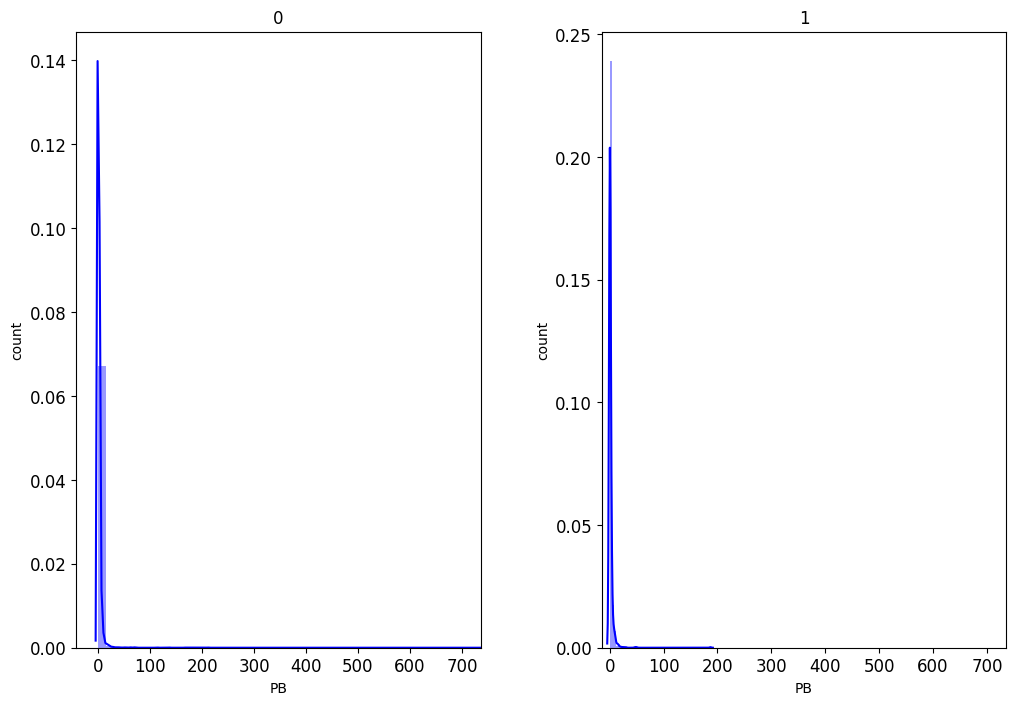

In [31]:
num_plot(train, train_0, train_1,'PB')

C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_0[column], color = color,
C:\Users\dlwks\AppData\Local\Temp\ipykernel_13804\672734326.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_1[column], color = color,


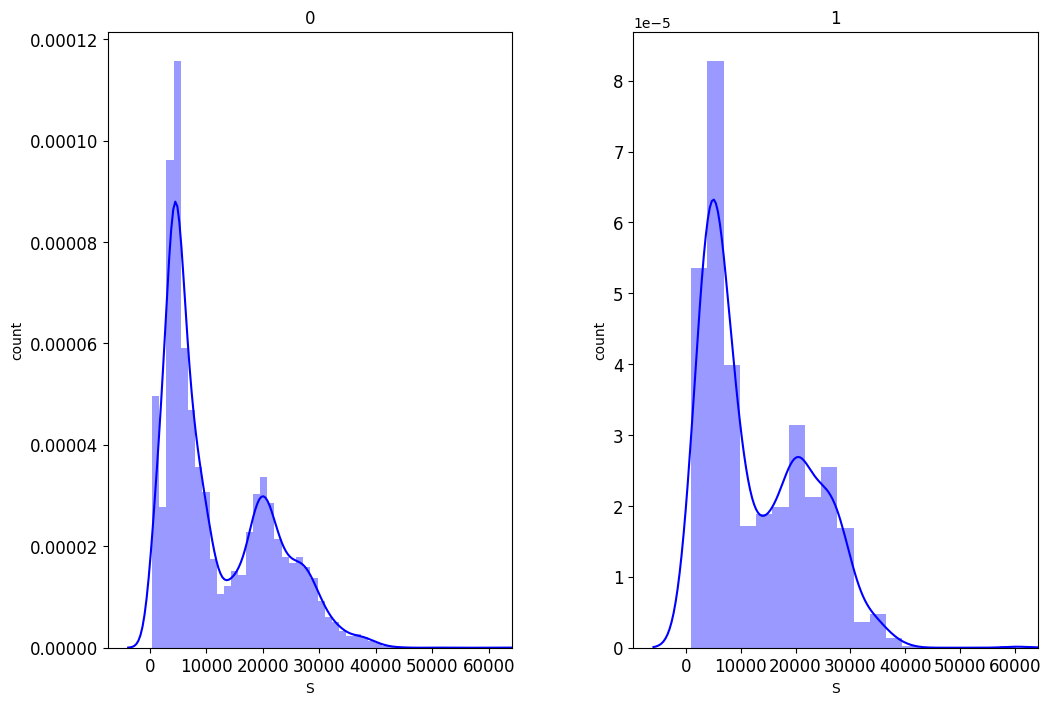

In [32]:
num_plot(train, train_0, train_1,'S')

In [33]:
train_corr = train.drop(train[cat_feat], axis = 1)

In [34]:
train_corr['Y_LABEL'] = train['Y_LABEL']

train_corr = train_corr.astype({'Y_LABEL' : 'int'})
corr = train_corr.corr(method = 'pearson')

In [35]:
plt.figure(figsize=(120,120))
sns.heatmap(data=corr, annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

<Axes: >

In [36]:
correlation = corr.unstack()
train_temp = pd.DataFrame(correlation['Y_LABEL'].sort_values(ascending = False), columns = ['Y_LABEL'])
train_temp.style.background_gradient(cmap = 'viridis')

,Y_LABEL
Y_LABEL,1.000000
AL,0.370512
BA,0.104840
FOPTIMETHGLY,0.055908
FNOX,0.053337
FE,0.047992
NI,0.046806
ANONYMOUS_1,0.044197
SI,0.036731
FOXID,0.032596


In [37]:
train = train[test.columns.to_list() + ['Y_LABEL', 'SAMPLE_TRANSFER_DAY']].copy()

In [38]:
train['YEAR_COMPONENT'] = train[['YEAR', 'COMPONENT_ARBITRARY']].apply(lambda x : '-'.join(x.astype(str)), axis = 1)
test['YEAR_COMPONENT'] = test[['YEAR', 'COMPONENT_ARBITRARY']].apply(lambda x : '-'.join(x.astype(str)), axis = 1)

var = [i for i in test.columns.tolist() if i not in ['ID', 'COMPONENT_ARBITRARY']]
train['zero_cnt'] = train[var].apply(lambda x : (x == 0).sum(), axis = 1)
test['zero_cnt'] = test[var].apply(lambda x : (x == 0).sum(), axis = 1) 

In [40]:
for var in ['ANONYMOUS_1', 'PQINDEX', 'V40', 'ZN', 'FE']:
    train[var + '_log1'] = np.log(train[var] + 1)
    test[var + '_log1'] = np.log(test[var] + 1)